In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('data.tsv', sep='\t')
data = data[:100_000]
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

In [5]:
data.head()

,agent_fee,balcony,building_type,exposition_time,first_day_exposition,floor,floors_total,kitchen_area,living_area,month,price,renovation,rooms_offered,studio,total_area,total_images,unified_address
0,60.0,0,4,551,2018-06-30T00:00:00.000+03:00,7,9.0,9.0,31.0,June,30000,0,2,False,48.0,12,"Россия, Москва, Ясеневая улица, 10к1"
1,50.0,0,4,544,2018-06-30T00:00:00.000+03:00,5,17.0,-1.0,-1.0,June,55000,0,2,False,60.0,12,"Россия, Москва, 13-я Парковая улица, 38к2"
2,50.0,0,4,544,2018-06-30T00:00:00.000+03:00,8,17.0,12.0,-1.0,June,45000,0,2,False,68.0,13,"Россия, Москва, Щёлковское шоссе, 27"
3,60.0,0,6,551,2018-06-30T00:00:00.000+03:00,7,16.0,10.0,20.0,June,25000,0,1,False,40.0,12,"Россия, Москва, Свободный проспект, 7к1"
4,50.0,0,1,443,2018-06-30T00:00:00.000+03:00,7,14.0,8.0,30.0,June,50000,0,2,False,40.0,16,"Россия, Москва, Фестивальная улица, 59к3"


In [6]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(n_estimators=300)

In [8]:
cbr.fit(X_train[num_features], y_train)
y_pred = cbr.predict(X_test[num_features])
mae_cbr = mean_absolute_error(y_test, y_pred)
print(mae_cbr)

Learning rate set to 0.213209
0:	learn: 75.7477412	total: 6.34ms	remaining: 1.9s
1:	learn: 75.3848343	total: 11.7ms	remaining: 1.74s
2:	learn: 75.1219333	total: 16.4ms	remaining: 1.62s
3:	learn: 74.9962405	total: 20.1ms	remaining: 1.49s
4:	learn: 74.8677196	total: 24.6ms	remaining: 1.45s
5:	learn: 74.7764668	total: 28.6ms	remaining: 1.4s
6:	learn: 74.7089984	total: 32.4ms	remaining: 1.36s
7:	learn: 74.6545760	total: 36.2ms	remaining: 1.32s
8:	learn: 74.6013355	total: 39.6ms	remaining: 1.28s
9:	learn: 74.5587082	total: 43ms	remaining: 1.25s
10:	learn: 74.5110464	total: 46.2ms	remaining: 1.21s
11:	learn: 74.4803030	total: 49.5ms	remaining: 1.19s
12:	learn: 74.4427033	total: 53ms	remaining: 1.17s
13:	learn: 74.4052806	total: 56.5ms	remaining: 1.15s
14:	learn: 74.3876387	total: 59.7ms	remaining: 1.13s
15:	learn: 74.3711255	total: 63.4ms	remaining: 1.13s
16:	learn: 74.3443614	total: 67.1ms	remaining: 1.12s
17:	learn: 74.3149924	total: 70.9ms	remaining: 1.11s
18:	learn: 74.2703821	total: 74.

161:	learn: 72.2141904	total: 590ms	remaining: 502ms
162:	learn: 72.2002924	total: 594ms	remaining: 499ms
163:	learn: 72.1954505	total: 597ms	remaining: 495ms
164:	learn: 72.1766238	total: 601ms	remaining: 492ms
165:	learn: 72.1534489	total: 605ms	remaining: 488ms
166:	learn: 72.1393377	total: 608ms	remaining: 485ms
167:	learn: 72.1275780	total: 612ms	remaining: 481ms
168:	learn: 72.1264779	total: 616ms	remaining: 477ms
169:	learn: 72.1121180	total: 620ms	remaining: 474ms
170:	learn: 72.0965572	total: 623ms	remaining: 470ms
171:	learn: 72.0817715	total: 627ms	remaining: 467ms
172:	learn: 72.0683193	total: 630ms	remaining: 463ms
173:	learn: 72.0537130	total: 634ms	remaining: 459ms
174:	learn: 72.0394010	total: 638ms	remaining: 455ms
175:	learn: 72.0304062	total: 641ms	remaining: 452ms
176:	learn: 72.0234281	total: 645ms	remaining: 448ms
177:	learn: 72.0068320	total: 649ms	remaining: 445ms
178:	learn: 71.9967683	total: 652ms	remaining: 441ms
179:	learn: 71.9828276	total: 656ms	remaining:

In [9]:
params = {'max_depth': [5, 7, 9],
         'learning_rate': [0.05, 0.1, 0.5]}
cbr = CatBoostRegressor(n_estimators=300, random_seed=0)

In [10]:
gs_cbr = cbr.grid_search(params, X=X_train[num_features], y=y_train, search_by_train_test_split=False)

Training on fold [0/3]
0:	learn: 86.9650194	test: 90.2847264	best: 90.2847264 (0)	total: 5.55ms	remaining: 1.66s
1:	learn: 85.8196306	test: 89.1374298	best: 89.1374298 (1)	total: 8.54ms	remaining: 1.27s
2:	learn: 84.7633939	test: 88.0835673	best: 88.0835673 (2)	total: 11.5ms	remaining: 1.14s
3:	learn: 83.7971568	test: 87.1164590	best: 87.1164590 (3)	total: 15.1ms	remaining: 1.12s
4:	learn: 82.9219902	test: 86.2428936	best: 86.2428936 (4)	total: 17.8ms	remaining: 1.05s
5:	learn: 82.1157749	test: 85.4390081	best: 85.4390081 (5)	total: 20.4ms	remaining: 999ms
6:	learn: 81.3710213	test: 84.6907010	best: 84.6907010 (6)	total: 24.6ms	remaining: 1.03s
7:	learn: 80.7046654	test: 84.0149146	best: 84.0149146 (7)	total: 27.3ms	remaining: 997ms
8:	learn: 80.0768100	test: 83.3872302	best: 83.3872302 (8)	total: 30.6ms	remaining: 991ms
9:	learn: 79.5098548	test: 82.8181552	best: 82.8181552 (9)	total: 33.1ms	remaining: 961ms
10:	learn: 78.9869011	test: 82.2938127	best: 82.2938127 (10)	total: 35.6ms	re

131:	learn: 73.1687302	test: 76.6346620	best: 76.6346620 (131)	total: 376ms	remaining: 478ms
132:	learn: 73.1606046	test: 76.6311399	best: 76.6311399 (132)	total: 381ms	remaining: 479ms
133:	learn: 73.1544623	test: 76.6290809	best: 76.6290809 (133)	total: 387ms	remaining: 479ms
134:	learn: 73.1486518	test: 76.6260573	best: 76.6260573 (134)	total: 393ms	remaining: 480ms
135:	learn: 73.1452058	test: 76.6251244	best: 76.6251244 (135)	total: 398ms	remaining: 480ms
136:	learn: 73.1393088	test: 76.6218495	best: 76.6218495 (136)	total: 401ms	remaining: 477ms
137:	learn: 73.1374911	test: 76.6202347	best: 76.6202347 (137)	total: 404ms	remaining: 474ms
138:	learn: 73.1338539	test: 76.6225351	best: 76.6202347 (137)	total: 408ms	remaining: 473ms
139:	learn: 73.1293156	test: 76.6231602	best: 76.6202347 (137)	total: 411ms	remaining: 469ms
140:	learn: 73.1236207	test: 76.6233405	best: 76.6202347 (137)	total: 413ms	remaining: 466ms
141:	learn: 73.1205865	test: 76.6265357	best: 76.6202347 (137)	total: 

263:	learn: 72.6265026	test: 76.4932010	best: 76.4932010 (263)	total: 783ms	remaining: 107ms
264:	learn: 72.6233376	test: 76.4933737	best: 76.4932010 (263)	total: 788ms	remaining: 104ms
265:	learn: 72.6186263	test: 76.4948094	best: 76.4932010 (263)	total: 791ms	remaining: 101ms
266:	learn: 72.6182452	test: 76.4950931	best: 76.4932010 (263)	total: 793ms	remaining: 98.1ms
267:	learn: 72.6153125	test: 76.4925858	best: 76.4925858 (267)	total: 796ms	remaining: 95.1ms
268:	learn: 72.6113855	test: 76.4908233	best: 76.4908233 (268)	total: 801ms	remaining: 92.3ms
269:	learn: 72.6080728	test: 76.4901002	best: 76.4901002 (269)	total: 804ms	remaining: 89.3ms
270:	learn: 72.6024694	test: 76.4887569	best: 76.4887569 (270)	total: 807ms	remaining: 86.3ms
271:	learn: 72.5993183	test: 76.4883668	best: 76.4883668 (271)	total: 809ms	remaining: 83.3ms
272:	learn: 72.5945815	test: 76.4881120	best: 76.4881120 (272)	total: 813ms	remaining: 80.4ms
273:	learn: 72.5895810	test: 76.4876263	best: 76.4876263 (273)	

85:	learn: 74.7571536	test: 73.8948169	best: 73.8948169 (85)	total: 281ms	remaining: 699ms
86:	learn: 74.7449742	test: 73.8916203	best: 73.8916203 (86)	total: 284ms	remaining: 696ms
87:	learn: 74.7349938	test: 73.8935913	best: 73.8916203 (86)	total: 289ms	remaining: 697ms
88:	learn: 74.7192105	test: 73.8903375	best: 73.8903375 (88)	total: 294ms	remaining: 698ms
89:	learn: 74.7114318	test: 73.8896751	best: 73.8896751 (89)	total: 297ms	remaining: 694ms
90:	learn: 74.7039259	test: 73.8932327	best: 73.8896751 (89)	total: 301ms	remaining: 692ms
91:	learn: 74.6999764	test: 73.8908432	best: 73.8896751 (89)	total: 305ms	remaining: 689ms
92:	learn: 74.6954314	test: 73.8917092	best: 73.8896751 (89)	total: 307ms	remaining: 683ms
93:	learn: 74.6884265	test: 73.8907883	best: 73.8896751 (89)	total: 310ms	remaining: 680ms
94:	learn: 74.6788584	test: 73.8898946	best: 73.8896751 (89)	total: 313ms	remaining: 676ms
95:	learn: 74.6704557	test: 73.8908002	best: 73.8896751 (89)	total: 316ms	remaining: 673ms

213:	learn: 74.0238064	test: 73.8701351	best: 73.8695938 (211)	total: 686ms	remaining: 276ms
214:	learn: 74.0205024	test: 73.8694390	best: 73.8694390 (214)	total: 689ms	remaining: 272ms
215:	learn: 74.0141660	test: 73.8682561	best: 73.8682561 (215)	total: 692ms	remaining: 269ms
216:	learn: 74.0086106	test: 73.8728106	best: 73.8682561 (215)	total: 696ms	remaining: 266ms
217:	learn: 74.0042320	test: 73.8740663	best: 73.8682561 (215)	total: 702ms	remaining: 264ms
218:	learn: 73.9981477	test: 73.8728506	best: 73.8682561 (215)	total: 707ms	remaining: 261ms
219:	learn: 73.9951916	test: 73.8724575	best: 73.8682561 (215)	total: 710ms	remaining: 258ms
220:	learn: 73.9911465	test: 73.8719148	best: 73.8682561 (215)	total: 716ms	remaining: 256ms
221:	learn: 73.9884661	test: 73.8724771	best: 73.8682561 (215)	total: 719ms	remaining: 253ms
222:	learn: 73.9834485	test: 73.8730739	best: 73.8682561 (215)	total: 722ms	remaining: 249ms
223:	learn: 73.9774411	test: 73.8721446	best: 73.8682561 (215)	total: 

31:	learn: 76.0661191	test: 74.4121298	best: 74.4121298 (31)	total: 101ms	remaining: 846ms
32:	learn: 76.0019778	test: 74.3496346	best: 74.3496346 (32)	total: 107ms	remaining: 863ms
33:	learn: 75.9372216	test: 74.2862396	best: 74.2862396 (33)	total: 112ms	remaining: 877ms
34:	learn: 75.8741612	test: 74.2276137	best: 74.2276137 (34)	total: 114ms	remaining: 866ms
35:	learn: 75.8165169	test: 74.1796475	best: 74.1796475 (35)	total: 117ms	remaining: 856ms
36:	learn: 75.7673604	test: 74.1308649	best: 74.1308649 (36)	total: 120ms	remaining: 855ms
37:	learn: 75.7132444	test: 74.0844521	best: 74.0844521 (37)	total: 123ms	remaining: 848ms
38:	learn: 75.6715594	test: 74.0482706	best: 74.0482706 (38)	total: 126ms	remaining: 840ms
39:	learn: 75.6301344	test: 74.0075096	best: 74.0075096 (39)	total: 128ms	remaining: 832ms
40:	learn: 75.5925698	test: 73.9727496	best: 73.9727496 (40)	total: 130ms	remaining: 823ms
41:	learn: 75.5662954	test: 73.9465170	best: 73.9465170 (41)	total: 133ms	remaining: 817ms

153:	learn: 74.6137178	test: 73.4301401	best: 73.4301401 (153)	total: 498ms	remaining: 472ms
154:	learn: 74.6077409	test: 73.4293416	best: 73.4293416 (154)	total: 501ms	remaining: 469ms
155:	learn: 74.5982544	test: 73.4252188	best: 73.4252188 (155)	total: 504ms	remaining: 466ms
156:	learn: 74.5941956	test: 73.4230697	best: 73.4230697 (156)	total: 507ms	remaining: 462ms
157:	learn: 74.5891904	test: 73.4229267	best: 73.4229267 (157)	total: 510ms	remaining: 458ms
158:	learn: 74.5803106	test: 73.4188426	best: 73.4188426 (158)	total: 515ms	remaining: 457ms
159:	learn: 74.5767000	test: 73.4163237	best: 73.4163237 (159)	total: 520ms	remaining: 455ms
160:	learn: 74.5718316	test: 73.4129744	best: 73.4129744 (160)	total: 524ms	remaining: 452ms
161:	learn: 74.5691838	test: 73.4117557	best: 73.4117557 (161)	total: 527ms	remaining: 449ms
162:	learn: 74.5667297	test: 73.4124434	best: 73.4117557 (161)	total: 530ms	remaining: 446ms
163:	learn: 74.5620631	test: 73.4131810	best: 73.4117557 (161)	total: 

281:	learn: 74.1485955	test: 73.3579889	best: 73.3492986 (261)	total: 899ms	remaining: 57.4ms
282:	learn: 74.1473593	test: 73.3589031	best: 73.3492986 (261)	total: 905ms	remaining: 54.3ms
283:	learn: 74.1438372	test: 73.3585278	best: 73.3492986 (261)	total: 911ms	remaining: 51.3ms
284:	learn: 74.1397371	test: 73.3594860	best: 73.3492986 (261)	total: 914ms	remaining: 48.1ms
285:	learn: 74.1352457	test: 73.3579602	best: 73.3492986 (261)	total: 916ms	remaining: 44.8ms
286:	learn: 74.1318343	test: 73.3577651	best: 73.3492986 (261)	total: 920ms	remaining: 41.7ms
287:	learn: 74.1305328	test: 73.3587949	best: 73.3492986 (261)	total: 923ms	remaining: 38.5ms
288:	learn: 74.1283583	test: 73.3589546	best: 73.3492986 (261)	total: 928ms	remaining: 35.3ms
289:	learn: 74.1257659	test: 73.3590070	best: 73.3492986 (261)	total: 930ms	remaining: 32.1ms
290:	learn: 74.1242935	test: 73.3601825	best: 73.3492986 (261)	total: 933ms	remaining: 28.9ms
291:	learn: 74.1209115	test: 73.3592135	best: 73.3492986 (26

95:	learn: 72.9475097	test: 76.6162595	best: 76.6133649 (93)	total: 324ms	remaining: 688ms
96:	learn: 72.9383494	test: 76.6128896	best: 76.6128896 (96)	total: 327ms	remaining: 684ms
97:	learn: 72.9263816	test: 76.6106577	best: 76.6106577 (97)	total: 329ms	remaining: 679ms
98:	learn: 72.9182555	test: 76.6103696	best: 76.6103696 (98)	total: 334ms	remaining: 679ms
99:	learn: 72.9047936	test: 76.6089276	best: 76.6089276 (99)	total: 341ms	remaining: 682ms
100:	learn: 72.8977692	test: 76.6061248	best: 76.6061248 (100)	total: 345ms	remaining: 679ms
101:	learn: 72.8883718	test: 76.6064312	best: 76.6061248 (100)	total: 349ms	remaining: 678ms
102:	learn: 72.8705591	test: 76.6005816	best: 76.6005816 (102)	total: 354ms	remaining: 678ms
103:	learn: 72.8638040	test: 76.6001751	best: 76.6001751 (103)	total: 357ms	remaining: 673ms
104:	learn: 72.8574754	test: 76.5972921	best: 76.5972921 (104)	total: 362ms	remaining: 672ms
105:	learn: 72.8432090	test: 76.5983348	best: 76.5972921 (104)	total: 365ms	rema

222:	learn: 71.9285262	test: 76.4491928	best: 76.4491928 (222)	total: 722ms	remaining: 249ms
223:	learn: 71.9241499	test: 76.4499995	best: 76.4491928 (222)	total: 726ms	remaining: 246ms
224:	learn: 71.9135711	test: 76.4513129	best: 76.4491928 (222)	total: 730ms	remaining: 243ms
225:	learn: 71.9056932	test: 76.4542650	best: 76.4491928 (222)	total: 736ms	remaining: 241ms
226:	learn: 71.8970549	test: 76.4530128	best: 76.4491928 (222)	total: 742ms	remaining: 239ms
227:	learn: 71.8928487	test: 76.4512060	best: 76.4491928 (222)	total: 746ms	remaining: 236ms
228:	learn: 71.8896618	test: 76.4515102	best: 76.4491928 (222)	total: 749ms	remaining: 232ms
229:	learn: 71.8828435	test: 76.4546486	best: 76.4491928 (222)	total: 751ms	remaining: 229ms
230:	learn: 71.8786174	test: 76.4554169	best: 76.4491928 (222)	total: 754ms	remaining: 225ms
231:	learn: 71.8731202	test: 76.4553567	best: 76.4491928 (222)	total: 756ms	remaining: 222ms
232:	learn: 71.8685121	test: 76.4532110	best: 76.4491928 (222)	total: 

39:	learn: 74.7917208	test: 73.8968537	best: 73.8968537 (39)	total: 128ms	remaining: 829ms
40:	learn: 74.7749235	test: 73.8927862	best: 73.8927862 (40)	total: 132ms	remaining: 831ms
41:	learn: 74.7618536	test: 73.8882675	best: 73.8882675 (41)	total: 134ms	remaining: 824ms
42:	learn: 74.7489285	test: 73.8898318	best: 73.8882675 (41)	total: 137ms	remaining: 819ms
43:	learn: 74.7290621	test: 73.8915765	best: 73.8882675 (41)	total: 140ms	remaining: 813ms
44:	learn: 74.7157031	test: 73.8930058	best: 73.8882675 (41)	total: 142ms	remaining: 806ms
45:	learn: 74.7022254	test: 73.8910594	best: 73.8882675 (41)	total: 148ms	remaining: 816ms
46:	learn: 74.6993028	test: 73.8910525	best: 73.8882675 (41)	total: 153ms	remaining: 824ms
47:	learn: 74.6850247	test: 73.8938696	best: 73.8882675 (41)	total: 157ms	remaining: 823ms
48:	learn: 74.6598844	test: 73.8936065	best: 73.8882675 (41)	total: 162ms	remaining: 829ms
49:	learn: 74.6439362	test: 73.8917632	best: 73.8882675 (41)	total: 165ms	remaining: 825ms

164:	learn: 73.5305602	test: 73.8750795	best: 73.8335002 (106)	total: 531ms	remaining: 435ms
165:	learn: 73.5234231	test: 73.8757088	best: 73.8335002 (106)	total: 534ms	remaining: 431ms
166:	learn: 73.5111411	test: 73.8763943	best: 73.8335002 (106)	total: 539ms	remaining: 429ms
167:	learn: 73.5017656	test: 73.8779222	best: 73.8335002 (106)	total: 543ms	remaining: 427ms
168:	learn: 73.4969848	test: 73.8780010	best: 73.8335002 (106)	total: 550ms	remaining: 426ms
169:	learn: 73.4905966	test: 73.8807592	best: 73.8335002 (106)	total: 554ms	remaining: 424ms
170:	learn: 73.4839231	test: 73.8761961	best: 73.8335002 (106)	total: 557ms	remaining: 420ms
171:	learn: 73.4759178	test: 73.8795037	best: 73.8335002 (106)	total: 559ms	remaining: 416ms
172:	learn: 73.4694936	test: 73.8809891	best: 73.8335002 (106)	total: 563ms	remaining: 413ms
173:	learn: 73.4634667	test: 73.8819581	best: 73.8335002 (106)	total: 566ms	remaining: 410ms
174:	learn: 73.4589677	test: 73.8836371	best: 73.8335002 (106)	total: 

276:	learn: 72.8190758	test: 73.9413831	best: 73.8335002 (106)	total: 933ms	remaining: 77.5ms
277:	learn: 72.8115217	test: 73.9427352	best: 73.8335002 (106)	total: 938ms	remaining: 74.3ms
278:	learn: 72.8067702	test: 73.9434600	best: 73.8335002 (106)	total: 942ms	remaining: 70.9ms
279:	learn: 72.8020456	test: 73.9432147	best: 73.8335002 (106)	total: 945ms	remaining: 67.5ms
280:	learn: 72.7952219	test: 73.9458834	best: 73.8335002 (106)	total: 949ms	remaining: 64.2ms
281:	learn: 72.7920112	test: 73.9450923	best: 73.8335002 (106)	total: 952ms	remaining: 60.8ms
282:	learn: 72.7877460	test: 73.9442072	best: 73.8335002 (106)	total: 955ms	remaining: 57.4ms
283:	learn: 72.7842866	test: 73.9448456	best: 73.8335002 (106)	total: 958ms	remaining: 54ms
284:	learn: 72.7785799	test: 73.9455431	best: 73.8335002 (106)	total: 961ms	remaining: 50.6ms
285:	learn: 72.7767855	test: 73.9461948	best: 73.8335002 (106)	total: 964ms	remaining: 47.2ms
286:	learn: 72.7681675	test: 73.9470677	best: 73.8335002 (106)

66:	learn: 74.7154354	test: 73.4518117	best: 73.4515509 (65)	total: 395ms	remaining: 1.37s
67:	learn: 74.7051578	test: 73.4483146	best: 73.4483146 (67)	total: 398ms	remaining: 1.36s
68:	learn: 74.6974453	test: 73.4404415	best: 73.4404415 (68)	total: 404ms	remaining: 1.35s
69:	learn: 74.6931078	test: 73.4435773	best: 73.4404415 (68)	total: 409ms	remaining: 1.34s
70:	learn: 74.6829601	test: 73.4462742	best: 73.4404415 (68)	total: 412ms	remaining: 1.33s
71:	learn: 74.6700242	test: 73.4476391	best: 73.4404415 (68)	total: 414ms	remaining: 1.31s
72:	learn: 74.6654632	test: 73.4441734	best: 73.4404415 (68)	total: 419ms	remaining: 1.3s
73:	learn: 74.6558892	test: 73.4417213	best: 73.4404415 (68)	total: 421ms	remaining: 1.29s
74:	learn: 74.6490197	test: 73.4442315	best: 73.4404415 (68)	total: 424ms	remaining: 1.27s
75:	learn: 74.6348089	test: 73.4452296	best: 73.4404415 (68)	total: 427ms	remaining: 1.26s
76:	learn: 74.6292291	test: 73.4422553	best: 73.4404415 (68)	total: 429ms	remaining: 1.24s


189:	learn: 73.7842819	test: 73.3688942	best: 73.3455281 (162)	total: 801ms	remaining: 464ms
190:	learn: 73.7783359	test: 73.3666738	best: 73.3455281 (162)	total: 804ms	remaining: 459ms
191:	learn: 73.7733817	test: 73.3683366	best: 73.3455281 (162)	total: 806ms	remaining: 454ms
192:	learn: 73.7661482	test: 73.3654101	best: 73.3455281 (162)	total: 809ms	remaining: 448ms
193:	learn: 73.7637777	test: 73.3690498	best: 73.3455281 (162)	total: 815ms	remaining: 445ms
194:	learn: 73.7565175	test: 73.3688275	best: 73.3455281 (162)	total: 820ms	remaining: 441ms
195:	learn: 73.7542952	test: 73.3686743	best: 73.3455281 (162)	total: 823ms	remaining: 437ms
196:	learn: 73.7499787	test: 73.3678869	best: 73.3455281 (162)	total: 828ms	remaining: 433ms
197:	learn: 73.7461401	test: 73.3694357	best: 73.3455281 (162)	total: 831ms	remaining: 428ms
198:	learn: 73.7369691	test: 73.3734621	best: 73.3455281 (162)	total: 833ms	remaining: 423ms
199:	learn: 73.7288523	test: 73.3794317	best: 73.3455281 (162)	total: 

6:	learn: 73.6713958	test: 76.9068526	best: 76.9068526 (6)	total: 22.5ms	remaining: 941ms
7:	learn: 73.6062710	test: 76.8820335	best: 76.8820335 (7)	total: 28.4ms	remaining: 1.04s
8:	learn: 73.5402115	test: 76.8855462	best: 76.8820335 (7)	total: 32.4ms	remaining: 1.04s
9:	learn: 73.4434418	test: 76.8634173	best: 76.8634173 (9)	total: 35.6ms	remaining: 1.03s
10:	learn: 73.3824002	test: 76.8238079	best: 76.8238079 (10)	total: 38.1ms	remaining: 1s
11:	learn: 73.3243053	test: 76.8231799	best: 76.8231799 (11)	total: 42.4ms	remaining: 1.02s
12:	learn: 73.2969143	test: 76.8210749	best: 76.8210749 (12)	total: 46.2ms	remaining: 1.02s
13:	learn: 73.2575477	test: 76.8061805	best: 76.8061805 (13)	total: 49.1ms	remaining: 1s
14:	learn: 73.2045315	test: 76.7377002	best: 76.7377002 (14)	total: 51.9ms	remaining: 987ms
15:	learn: 73.1451603	test: 76.7290382	best: 76.7290382 (15)	total: 54.4ms	remaining: 966ms
16:	learn: 73.0832479	test: 76.7297444	best: 76.7290382 (15)	total: 59.1ms	remaining: 983ms
17

129:	learn: 69.7014452	test: 77.0682419	best: 76.5802339 (42)	total: 429ms	remaining: 562ms
130:	learn: 69.6730349	test: 77.0835892	best: 76.5802339 (42)	total: 432ms	remaining: 558ms
131:	learn: 69.6310229	test: 77.0971407	best: 76.5802339 (42)	total: 438ms	remaining: 558ms
132:	learn: 69.6047342	test: 77.1025745	best: 76.5802339 (42)	total: 442ms	remaining: 555ms
133:	learn: 69.5993387	test: 77.1051368	best: 76.5802339 (42)	total: 445ms	remaining: 551ms
134:	learn: 69.5861199	test: 77.1062889	best: 76.5802339 (42)	total: 448ms	remaining: 547ms
135:	learn: 69.5694298	test: 77.1155170	best: 76.5802339 (42)	total: 452ms	remaining: 545ms
136:	learn: 69.5470130	test: 77.1341185	best: 76.5802339 (42)	total: 454ms	remaining: 541ms
137:	learn: 69.5352626	test: 77.1355777	best: 76.5802339 (42)	total: 457ms	remaining: 537ms
138:	learn: 69.5142151	test: 77.1372961	best: 76.5802339 (42)	total: 460ms	remaining: 533ms
139:	learn: 69.4901467	test: 77.1374784	best: 76.5802339 (42)	total: 463ms	remai

252:	learn: 67.5215442	test: 77.5116247	best: 76.5802339 (42)	total: 832ms	remaining: 154ms
253:	learn: 67.5028594	test: 77.5115854	best: 76.5802339 (42)	total: 834ms	remaining: 151ms
254:	learn: 67.4796344	test: 77.5067058	best: 76.5802339 (42)	total: 837ms	remaining: 148ms
255:	learn: 67.4674070	test: 77.5011711	best: 76.5802339 (42)	total: 841ms	remaining: 144ms
256:	learn: 67.4332711	test: 77.5140571	best: 76.5802339 (42)	total: 844ms	remaining: 141ms
257:	learn: 67.4230895	test: 77.5186138	best: 76.5802339 (42)	total: 849ms	remaining: 138ms
258:	learn: 67.4037538	test: 77.5289044	best: 76.5802339 (42)	total: 854ms	remaining: 135ms
259:	learn: 67.3931200	test: 77.5280322	best: 76.5802339 (42)	total: 857ms	remaining: 132ms
260:	learn: 67.3837219	test: 77.5314244	best: 76.5802339 (42)	total: 860ms	remaining: 128ms
261:	learn: 67.3709476	test: 77.5341714	best: 76.5802339 (42)	total: 863ms	remaining: 125ms
262:	learn: 67.3536687	test: 77.5389420	best: 76.5802339 (42)	total: 866ms	remai

71:	learn: 72.3576434	test: 74.3035294	best: 73.9581661 (12)	total: 232ms	remaining: 736ms
72:	learn: 72.3340474	test: 74.3285671	best: 73.9581661 (12)	total: 236ms	remaining: 733ms
73:	learn: 72.3182009	test: 74.3423353	best: 73.9581661 (12)	total: 239ms	remaining: 731ms
74:	learn: 72.2286829	test: 74.3527137	best: 73.9581661 (12)	total: 244ms	remaining: 732ms
75:	learn: 72.2079679	test: 74.3658216	best: 73.9581661 (12)	total: 249ms	remaining: 733ms
76:	learn: 72.1852715	test: 74.3830576	best: 73.9581661 (12)	total: 251ms	remaining: 727ms
77:	learn: 72.1663336	test: 74.3810208	best: 73.9581661 (12)	total: 254ms	remaining: 722ms
78:	learn: 72.1323831	test: 74.3868998	best: 73.9581661 (12)	total: 258ms	remaining: 721ms
79:	learn: 72.1019106	test: 74.3961412	best: 73.9581661 (12)	total: 260ms	remaining: 716ms
80:	learn: 72.1009677	test: 74.3969345	best: 73.9581661 (12)	total: 264ms	remaining: 714ms
81:	learn: 72.0937929	test: 74.3972882	best: 73.9581661 (12)	total: 267ms	remaining: 709ms

191:	learn: 69.9255707	test: 74.9103965	best: 73.9581661 (12)	total: 635ms	remaining: 357ms
192:	learn: 69.9121568	test: 74.9159421	best: 73.9581661 (12)	total: 637ms	remaining: 353ms
193:	learn: 69.8819088	test: 74.9323574	best: 73.9581661 (12)	total: 641ms	remaining: 350ms
194:	learn: 69.8610049	test: 74.9344958	best: 73.9581661 (12)	total: 643ms	remaining: 346ms
195:	learn: 69.8277712	test: 74.9258958	best: 73.9581661 (12)	total: 646ms	remaining: 343ms
196:	learn: 69.8095587	test: 74.9350880	best: 73.9581661 (12)	total: 650ms	remaining: 340ms
197:	learn: 69.7984027	test: 74.9349543	best: 73.9581661 (12)	total: 655ms	remaining: 337ms
198:	learn: 69.7923088	test: 74.9368642	best: 73.9581661 (12)	total: 659ms	remaining: 335ms
199:	learn: 69.7737908	test: 74.9327906	best: 73.9581661 (12)	total: 662ms	remaining: 331ms
200:	learn: 69.7647636	test: 74.9329042	best: 73.9581661 (12)	total: 665ms	remaining: 328ms
201:	learn: 69.7597547	test: 74.9365492	best: 73.9581661 (12)	total: 668ms	remai

5:	learn: 75.1643396	test: 73.7702295	best: 73.7702295 (5)	total: 21.7ms	remaining: 1.06s
6:	learn: 75.0502798	test: 73.7174775	best: 73.7174775 (6)	total: 24.7ms	remaining: 1.03s
7:	learn: 75.0005440	test: 73.6826040	best: 73.6826040 (7)	total: 29.2ms	remaining: 1.07s
8:	learn: 74.9505888	test: 73.6782529	best: 73.6782529 (8)	total: 33.6ms	remaining: 1.08s
9:	learn: 74.8997783	test: 73.6591849	best: 73.6591849 (9)	total: 39ms	remaining: 1.13s
10:	learn: 74.8464914	test: 73.6402493	best: 73.6402493 (10)	total: 41.6ms	remaining: 1.09s
11:	learn: 74.7825108	test: 73.6495953	best: 73.6402493 (10)	total: 45ms	remaining: 1.08s
12:	learn: 74.7335008	test: 73.6486477	best: 73.6402493 (10)	total: 48.6ms	remaining: 1.07s
13:	learn: 74.6806137	test: 73.6575592	best: 73.6402493 (10)	total: 51.9ms	remaining: 1.06s
14:	learn: 74.6570882	test: 73.6771944	best: 73.6402493 (10)	total: 54.2ms	remaining: 1.03s
15:	learn: 74.6234704	test: 73.6652396	best: 73.6402493 (10)	total: 56.8ms	remaining: 1.01s
16

127:	learn: 71.5461017	test: 74.1617137	best: 73.5576553 (37)	total: 421ms	remaining: 566ms
128:	learn: 71.5146766	test: 74.1610311	best: 73.5576553 (37)	total: 427ms	remaining: 566ms
129:	learn: 71.4924753	test: 74.1738003	best: 73.5576553 (37)	total: 432ms	remaining: 565ms
130:	learn: 71.4753038	test: 74.1814128	best: 73.5576553 (37)	total: 435ms	remaining: 561ms
131:	learn: 71.4315318	test: 74.2094059	best: 73.5576553 (37)	total: 437ms	remaining: 557ms
132:	learn: 71.4000475	test: 74.2129904	best: 73.5576553 (37)	total: 442ms	remaining: 555ms
133:	learn: 71.3655772	test: 74.2103008	best: 73.5576553 (37)	total: 444ms	remaining: 551ms
134:	learn: 71.3564253	test: 74.2225330	best: 73.5576553 (37)	total: 447ms	remaining: 546ms
135:	learn: 71.3416445	test: 74.2280921	best: 73.5576553 (37)	total: 449ms	remaining: 542ms
136:	learn: 71.3285683	test: 74.2295158	best: 73.5576553 (37)	total: 452ms	remaining: 538ms
137:	learn: 71.3162217	test: 74.2302568	best: 73.5576553 (37)	total: 456ms	remai

252:	learn: 69.1962965	test: 74.7540325	best: 73.5576553 (37)	total: 825ms	remaining: 153ms
253:	learn: 69.1882066	test: 74.7524539	best: 73.5576553 (37)	total: 828ms	remaining: 150ms
254:	learn: 69.1642715	test: 74.7551960	best: 73.5576553 (37)	total: 830ms	remaining: 147ms
255:	learn: 69.1296359	test: 74.7702618	best: 73.5576553 (37)	total: 836ms	remaining: 144ms
256:	learn: 69.0893554	test: 74.7808244	best: 73.5576553 (37)	total: 840ms	remaining: 141ms
257:	learn: 69.0864626	test: 74.7787509	best: 73.5576553 (37)	total: 843ms	remaining: 137ms
258:	learn: 69.0840987	test: 74.7651720	best: 73.5576553 (37)	total: 845ms	remaining: 134ms
259:	learn: 69.0576571	test: 74.7880630	best: 73.5576553 (37)	total: 848ms	remaining: 130ms
260:	learn: 69.0435948	test: 74.7867961	best: 73.5576553 (37)	total: 852ms	remaining: 127ms
261:	learn: 69.0345326	test: 74.7885921	best: 73.5576553 (37)	total: 855ms	remaining: 124ms
262:	learn: 69.0285157	test: 74.7938275	best: 73.5576553 (37)	total: 857ms	remai

49:	learn: 73.5552044	test: 76.9279081	best: 76.9279081 (49)	total: 237ms	remaining: 1.19s
50:	learn: 73.5315523	test: 76.9085132	best: 76.9085132 (50)	total: 244ms	remaining: 1.19s
51:	learn: 73.5067925	test: 76.8922026	best: 76.8922026 (51)	total: 248ms	remaining: 1.18s
52:	learn: 73.4874338	test: 76.8792762	best: 76.8792762 (52)	total: 254ms	remaining: 1.18s
53:	learn: 73.4681243	test: 76.8652243	best: 76.8652243 (53)	total: 258ms	remaining: 1.18s
54:	learn: 73.4520381	test: 76.8568869	best: 76.8568869 (54)	total: 262ms	remaining: 1.17s
55:	learn: 73.4348441	test: 76.8481741	best: 76.8481741 (55)	total: 266ms	remaining: 1.16s
56:	learn: 73.4188504	test: 76.8394166	best: 76.8394166 (56)	total: 272ms	remaining: 1.16s
57:	learn: 73.4040292	test: 76.8281360	best: 76.8281360 (57)	total: 277ms	remaining: 1.16s
58:	learn: 73.3884111	test: 76.8139679	best: 76.8139679 (58)	total: 281ms	remaining: 1.15s
59:	learn: 73.3699348	test: 76.8029957	best: 76.8029957 (59)	total: 286ms	remaining: 1.14s

163:	learn: 72.4509662	test: 76.5207066	best: 76.5207066 (163)	total: 841ms	remaining: 697ms
164:	learn: 72.4380466	test: 76.5123488	best: 76.5123488 (164)	total: 850ms	remaining: 695ms
165:	learn: 72.4326820	test: 76.5119311	best: 76.5119311 (165)	total: 858ms	remaining: 692ms
166:	learn: 72.4247838	test: 76.5101711	best: 76.5101711 (166)	total: 865ms	remaining: 689ms
167:	learn: 72.4152532	test: 76.5043949	best: 76.5043949 (167)	total: 872ms	remaining: 685ms
168:	learn: 72.4093110	test: 76.5040241	best: 76.5040241 (168)	total: 880ms	remaining: 682ms
169:	learn: 72.4067395	test: 76.5043093	best: 76.5040241 (168)	total: 886ms	remaining: 678ms
170:	learn: 72.3996971	test: 76.4992156	best: 76.4992156 (170)	total: 895ms	remaining: 675ms
171:	learn: 72.3925414	test: 76.4969262	best: 76.4969262 (171)	total: 902ms	remaining: 671ms
172:	learn: 72.3882975	test: 76.4961616	best: 76.4961616 (172)	total: 910ms	remaining: 668ms
173:	learn: 72.3753972	test: 76.4953245	best: 76.4953245 (173)	total: 

293:	learn: 71.5745482	test: 76.4305867	best: 76.4261471 (284)	total: 1.65s	remaining: 33.7ms
294:	learn: 71.5677551	test: 76.4326829	best: 76.4261471 (284)	total: 1.66s	remaining: 28.1ms
295:	learn: 71.5598186	test: 76.4326195	best: 76.4261471 (284)	total: 1.66s	remaining: 22.5ms
296:	learn: 71.5508742	test: 76.4338959	best: 76.4261471 (284)	total: 1.67s	remaining: 16.8ms
297:	learn: 71.5438502	test: 76.4335720	best: 76.4261471 (284)	total: 1.67s	remaining: 11.2ms
298:	learn: 71.5370693	test: 76.4347029	best: 76.4261471 (284)	total: 1.68s	remaining: 5.6ms
299:	learn: 71.5288614	test: 76.4357842	best: 76.4261471 (284)	total: 1.68s	remaining: 0us

bestTest = 76.42614708
bestIteration = 284

Training on fold [1/3]
0:	learn: 88.6252548	test: 86.8782409	best: 86.8782409 (0)	total: 4.76ms	remaining: 1.42s
1:	learn: 87.4418098	test: 85.7193276	best: 85.7193276 (1)	total: 11ms	remaining: 1.65s
2:	learn: 86.3495146	test: 84.6468332	best: 84.6468332 (2)	total: 14.6ms	remaining: 1.45s
3:	learn: 

87:	learn: 74.3350162	test: 73.8010646	best: 73.7949691 (82)	total: 362ms	remaining: 871ms
88:	learn: 74.3251414	test: 73.8010062	best: 73.7949691 (82)	total: 366ms	remaining: 869ms
89:	learn: 74.3033775	test: 73.7996674	best: 73.7949691 (82)	total: 373ms	remaining: 870ms
90:	learn: 74.2958668	test: 73.7984520	best: 73.7949691 (82)	total: 376ms	remaining: 864ms
91:	learn: 74.2878861	test: 73.7995747	best: 73.7949691 (82)	total: 381ms	remaining: 862ms
92:	learn: 74.2731219	test: 73.7987192	best: 73.7949691 (82)	total: 387ms	remaining: 861ms
93:	learn: 74.2625287	test: 73.7958054	best: 73.7949691 (82)	total: 392ms	remaining: 859ms
94:	learn: 74.2516671	test: 73.7965807	best: 73.7949691 (82)	total: 397ms	remaining: 857ms
95:	learn: 74.2408091	test: 73.7989587	best: 73.7949691 (82)	total: 403ms	remaining: 856ms
96:	learn: 74.2244162	test: 73.7995998	best: 73.7949691 (82)	total: 407ms	remaining: 852ms
97:	learn: 74.2121884	test: 73.7993529	best: 73.7949691 (82)	total: 412ms	remaining: 849ms

223:	learn: 73.1299725	test: 73.8161803	best: 73.7760733 (118)	total: 967ms	remaining: 328ms
224:	learn: 73.1240686	test: 73.8185268	best: 73.7760733 (118)	total: 972ms	remaining: 324ms
225:	learn: 73.1186332	test: 73.8177564	best: 73.7760733 (118)	total: 975ms	remaining: 319ms
226:	learn: 73.1119767	test: 73.8198724	best: 73.7760733 (118)	total: 980ms	remaining: 315ms
227:	learn: 73.1067369	test: 73.8220566	best: 73.7760733 (118)	total: 983ms	remaining: 311ms
228:	learn: 73.0997764	test: 73.8187896	best: 73.7760733 (118)	total: 988ms	remaining: 306ms
229:	learn: 73.0896844	test: 73.8164612	best: 73.7760733 (118)	total: 992ms	remaining: 302ms
230:	learn: 73.0836191	test: 73.8170845	best: 73.7760733 (118)	total: 997ms	remaining: 298ms
231:	learn: 73.0760682	test: 73.8182195	best: 73.7760733 (118)	total: 1s	remaining: 293ms
232:	learn: 73.0714704	test: 73.8192082	best: 73.7760733 (118)	total: 1s	remaining: 289ms
233:	learn: 73.0563338	test: 73.8200911	best: 73.7760733 (118)	total: 1.01s	

62:	learn: 74.9592927	test: 73.5887061	best: 73.5887061 (62)	total: 245ms	remaining: 920ms
63:	learn: 74.9329692	test: 73.5804104	best: 73.5804104 (63)	total: 249ms	remaining: 917ms
64:	learn: 74.9103749	test: 73.5677058	best: 73.5677058 (64)	total: 253ms	remaining: 915ms
65:	learn: 74.8942705	test: 73.5630711	best: 73.5630711 (65)	total: 257ms	remaining: 912ms
66:	learn: 74.8759688	test: 73.5549069	best: 73.5549069 (66)	total: 262ms	remaining: 910ms
67:	learn: 74.8621274	test: 73.5485281	best: 73.5485281 (67)	total: 265ms	remaining: 905ms
68:	learn: 74.8456411	test: 73.5446631	best: 73.5446631 (68)	total: 269ms	remaining: 900ms
69:	learn: 74.8336771	test: 73.5406629	best: 73.5406629 (69)	total: 272ms	remaining: 894ms
70:	learn: 74.8248962	test: 73.5373385	best: 73.5373385 (70)	total: 277ms	remaining: 892ms
71:	learn: 74.8112183	test: 73.5342143	best: 73.5342143 (71)	total: 280ms	remaining: 888ms
72:	learn: 74.7954371	test: 73.5333188	best: 73.5333188 (72)	total: 285ms	remaining: 885ms

182:	learn: 73.8523147	test: 73.3669284	best: 73.3667305 (178)	total: 855ms	remaining: 547ms
183:	learn: 73.8484028	test: 73.3655566	best: 73.3655566 (183)	total: 860ms	remaining: 542ms
184:	learn: 73.8433081	test: 73.3668252	best: 73.3655566 (183)	total: 863ms	remaining: 537ms
185:	learn: 73.8360866	test: 73.3672259	best: 73.3655566 (183)	total: 869ms	remaining: 532ms
186:	learn: 73.8320751	test: 73.3660485	best: 73.3655566 (183)	total: 873ms	remaining: 528ms
187:	learn: 73.8251019	test: 73.3633857	best: 73.3633857 (187)	total: 878ms	remaining: 523ms
188:	learn: 73.8201146	test: 73.3638346	best: 73.3633857 (187)	total: 883ms	remaining: 519ms
189:	learn: 73.8166509	test: 73.3648599	best: 73.3633857 (187)	total: 888ms	remaining: 514ms
190:	learn: 73.8072328	test: 73.3660523	best: 73.3633857 (187)	total: 892ms	remaining: 509ms
191:	learn: 73.8022635	test: 73.3657594	best: 73.3633857 (187)	total: 900ms	remaining: 506ms
192:	learn: 73.7978231	test: 73.3642575	best: 73.3633857 (187)	total: 

14:	learn: 74.4494946	test: 77.7965493	best: 77.7965493 (14)	total: 65.7ms	remaining: 1.25s
15:	learn: 74.3036698	test: 77.6523992	best: 77.6523992 (15)	total: 69.2ms	remaining: 1.23s
16:	learn: 74.1527009	test: 77.4985837	best: 77.4985837 (16)	total: 73ms	remaining: 1.21s
17:	learn: 74.0300136	test: 77.3854152	best: 77.3854152 (17)	total: 77.1ms	remaining: 1.21s
18:	learn: 73.9421561	test: 77.2994851	best: 77.2994851 (18)	total: 80.9ms	remaining: 1.2s
19:	learn: 73.8640603	test: 77.2251642	best: 77.2251642 (19)	total: 84.8ms	remaining: 1.19s
20:	learn: 73.8043787	test: 77.1639999	best: 77.1639999 (20)	total: 88.6ms	remaining: 1.18s
21:	learn: 73.7497726	test: 77.1144129	best: 77.1144129 (21)	total: 91.9ms	remaining: 1.16s
22:	learn: 73.7084697	test: 77.0729766	best: 77.0729766 (22)	total: 96ms	remaining: 1.16s
23:	learn: 73.6566846	test: 77.0351695	best: 77.0351695 (23)	total: 100ms	remaining: 1.15s
24:	learn: 73.5891727	test: 76.9725031	best: 76.9725031 (24)	total: 104ms	remaining: 1

121:	learn: 71.9841971	test: 76.4952255	best: 76.4952255 (121)	total: 471ms	remaining: 688ms
122:	learn: 71.9617822	test: 76.4980514	best: 76.4952255 (121)	total: 476ms	remaining: 685ms
123:	learn: 71.9578824	test: 76.4991021	best: 76.4952255 (121)	total: 479ms	remaining: 680ms
124:	learn: 71.9415874	test: 76.4989331	best: 76.4952255 (121)	total: 483ms	remaining: 676ms
125:	learn: 71.9326757	test: 76.4969425	best: 76.4952255 (121)	total: 487ms	remaining: 672ms
126:	learn: 71.9162889	test: 76.4987088	best: 76.4952255 (121)	total: 490ms	remaining: 668ms
127:	learn: 71.8923253	test: 76.4957716	best: 76.4952255 (121)	total: 494ms	remaining: 664ms
128:	learn: 71.8805208	test: 76.4952970	best: 76.4952255 (121)	total: 498ms	remaining: 660ms
129:	learn: 71.8786769	test: 76.4952697	best: 76.4952255 (121)	total: 501ms	remaining: 656ms
130:	learn: 71.8533079	test: 76.4879743	best: 76.4879743 (130)	total: 505ms	remaining: 651ms
131:	learn: 71.8454131	test: 76.4893289	best: 76.4879743 (130)	total: 

227:	learn: 70.5656222	test: 76.5150346	best: 76.4716646 (146)	total: 877ms	remaining: 277ms
228:	learn: 70.5555471	test: 76.5136736	best: 76.4716646 (146)	total: 883ms	remaining: 274ms
229:	learn: 70.5480442	test: 76.5150790	best: 76.4716646 (146)	total: 888ms	remaining: 270ms
230:	learn: 70.5370520	test: 76.5156634	best: 76.4716646 (146)	total: 893ms	remaining: 267ms
231:	learn: 70.5285653	test: 76.5174620	best: 76.4716646 (146)	total: 898ms	remaining: 263ms
232:	learn: 70.5122462	test: 76.5181350	best: 76.4716646 (146)	total: 903ms	remaining: 260ms
233:	learn: 70.5027116	test: 76.5174573	best: 76.4716646 (146)	total: 910ms	remaining: 257ms
234:	learn: 70.4931536	test: 76.5142163	best: 76.4716646 (146)	total: 915ms	remaining: 253ms
235:	learn: 70.4882841	test: 76.5167774	best: 76.4716646 (146)	total: 922ms	remaining: 250ms
236:	learn: 70.4819596	test: 76.5137941	best: 76.4716646 (146)	total: 927ms	remaining: 246ms
237:	learn: 70.4802653	test: 76.5153451	best: 76.4716646 (146)	total: 

15:	learn: 75.6852903	test: 74.5045472	best: 74.5045472 (15)	total: 72.7ms	remaining: 1.29s
16:	learn: 75.5377773	test: 74.3746347	best: 74.3746347 (16)	total: 78.9ms	remaining: 1.31s
17:	learn: 75.4148250	test: 74.2911975	best: 74.2911975 (17)	total: 84.5ms	remaining: 1.32s
18:	learn: 75.3020575	test: 74.2088225	best: 74.2088225 (18)	total: 88ms	remaining: 1.3s
19:	learn: 75.2258856	test: 74.1502949	best: 74.1502949 (19)	total: 95.1ms	remaining: 1.33s
20:	learn: 75.1524706	test: 74.1015807	best: 74.1015807 (20)	total: 101ms	remaining: 1.35s
21:	learn: 75.0881103	test: 74.0649372	best: 74.0649372 (21)	total: 106ms	remaining: 1.34s
22:	learn: 75.0383384	test: 74.0269643	best: 74.0269643 (22)	total: 112ms	remaining: 1.35s
23:	learn: 74.9964421	test: 74.0013175	best: 74.0013175 (23)	total: 118ms	remaining: 1.35s
24:	learn: 74.9550713	test: 73.9681034	best: 73.9681034 (24)	total: 122ms	remaining: 1.34s
25:	learn: 74.8976864	test: 73.9533181	best: 73.9533181 (25)	total: 132ms	remaining: 1.3

151:	learn: 72.6455389	test: 73.8783084	best: 73.8185122 (56)	total: 675ms	remaining: 657ms
152:	learn: 72.6347895	test: 73.8786325	best: 73.8185122 (56)	total: 680ms	remaining: 654ms
153:	learn: 72.6248053	test: 73.8818034	best: 73.8185122 (56)	total: 684ms	remaining: 649ms
154:	learn: 72.6163366	test: 73.8785336	best: 73.8185122 (56)	total: 688ms	remaining: 644ms
155:	learn: 72.6078181	test: 73.8815007	best: 73.8185122 (56)	total: 692ms	remaining: 638ms
156:	learn: 72.5936611	test: 73.8812435	best: 73.8185122 (56)	total: 696ms	remaining: 634ms
157:	learn: 72.5836474	test: 73.8810656	best: 73.8185122 (56)	total: 699ms	remaining: 628ms
158:	learn: 72.5702220	test: 73.8831141	best: 73.8185122 (56)	total: 703ms	remaining: 623ms
159:	learn: 72.5597471	test: 73.8839159	best: 73.8185122 (56)	total: 706ms	remaining: 618ms
160:	learn: 72.5528314	test: 73.8868090	best: 73.8185122 (56)	total: 711ms	remaining: 613ms
161:	learn: 72.5361107	test: 73.8846831	best: 73.8185122 (56)	total: 716ms	remai

245:	learn: 71.5747434	test: 73.9930773	best: 73.8185122 (56)	total: 1.08s	remaining: 238ms
246:	learn: 71.5666080	test: 73.9959426	best: 73.8185122 (56)	total: 1.09s	remaining: 234ms
247:	learn: 71.5604566	test: 73.9984688	best: 73.8185122 (56)	total: 1.09s	remaining: 230ms
248:	learn: 71.5384049	test: 73.9899384	best: 73.8185122 (56)	total: 1.1s	remaining: 225ms
249:	learn: 71.5310497	test: 73.9928258	best: 73.8185122 (56)	total: 1.1s	remaining: 221ms
250:	learn: 71.5250465	test: 73.9951694	best: 73.8185122 (56)	total: 1.11s	remaining: 216ms
251:	learn: 71.5138789	test: 73.9989615	best: 73.8185122 (56)	total: 1.11s	remaining: 212ms
252:	learn: 71.5061316	test: 73.9990249	best: 73.8185122 (56)	total: 1.12s	remaining: 208ms
253:	learn: 71.5006521	test: 73.9970481	best: 73.8185122 (56)	total: 1.12s	remaining: 203ms
254:	learn: 71.4864913	test: 73.9992464	best: 73.8185122 (56)	total: 1.13s	remaining: 199ms
255:	learn: 71.4746848	test: 73.9976762	best: 73.8185122 (56)	total: 1.13s	remaini

65:	learn: 74.2400599	test: 73.3731122	best: 73.3731122 (65)	total: 317ms	remaining: 1.12s
66:	learn: 74.2272636	test: 73.3673057	best: 73.3673057 (66)	total: 322ms	remaining: 1.12s
67:	learn: 74.2147655	test: 73.3678348	best: 73.3673057 (66)	total: 327ms	remaining: 1.12s
68:	learn: 74.2032286	test: 73.3705578	best: 73.3673057 (66)	total: 331ms	remaining: 1.11s
69:	learn: 74.1899449	test: 73.3693529	best: 73.3673057 (66)	total: 337ms	remaining: 1.11s
70:	learn: 74.1829383	test: 73.3671253	best: 73.3671253 (70)	total: 341ms	remaining: 1.1s
71:	learn: 74.1727222	test: 73.3694273	best: 73.3671253 (70)	total: 347ms	remaining: 1.1s
72:	learn: 74.1632660	test: 73.3659658	best: 73.3659658 (72)	total: 352ms	remaining: 1.09s
73:	learn: 74.1547119	test: 73.3602189	best: 73.3602189 (73)	total: 359ms	remaining: 1.1s
74:	learn: 74.1414730	test: 73.3603246	best: 73.3602189 (73)	total: 363ms	remaining: 1.09s
75:	learn: 74.1347043	test: 73.3604002	best: 73.3602189 (73)	total: 369ms	remaining: 1.09s
76

181:	learn: 72.6862831	test: 73.3651213	best: 73.3274123 (163)	total: 919ms	remaining: 596ms
182:	learn: 72.6652653	test: 73.3687197	best: 73.3274123 (163)	total: 923ms	remaining: 590ms
183:	learn: 72.6591354	test: 73.3659197	best: 73.3274123 (163)	total: 930ms	remaining: 586ms
184:	learn: 72.6543394	test: 73.3679659	best: 73.3274123 (163)	total: 936ms	remaining: 582ms
185:	learn: 72.6436666	test: 73.3668577	best: 73.3274123 (163)	total: 942ms	remaining: 577ms
186:	learn: 72.6306667	test: 73.3645106	best: 73.3274123 (163)	total: 948ms	remaining: 573ms
187:	learn: 72.6192354	test: 73.3647031	best: 73.3274123 (163)	total: 952ms	remaining: 567ms
188:	learn: 72.6168919	test: 73.3651081	best: 73.3274123 (163)	total: 957ms	remaining: 562ms
189:	learn: 72.6099174	test: 73.3636188	best: 73.3274123 (163)	total: 964ms	remaining: 558ms
190:	learn: 72.6006712	test: 73.3656467	best: 73.3274123 (163)	total: 967ms	remaining: 552ms
191:	learn: 72.5859010	test: 73.3668482	best: 73.3274123 (163)	total: 

7:	learn: 73.1435859	test: 76.7393046	best: 76.7393046 (7)	total: 41.9ms	remaining: 1.53s
8:	learn: 73.0588556	test: 76.7120591	best: 76.7120591 (8)	total: 48.8ms	remaining: 1.58s
9:	learn: 73.0132688	test: 76.6972379	best: 76.6972379 (9)	total: 53ms	remaining: 1.54s
10:	learn: 72.9054183	test: 76.6451624	best: 76.6451624 (10)	total: 57.2ms	remaining: 1.5s
11:	learn: 72.7890782	test: 76.6229147	best: 76.6229147 (11)	total: 62ms	remaining: 1.49s
12:	learn: 72.7537228	test: 76.6161171	best: 76.6161171 (12)	total: 65.8ms	remaining: 1.45s
13:	learn: 72.6762623	test: 76.5716657	best: 76.5716657 (13)	total: 70.7ms	remaining: 1.44s
14:	learn: 72.6381400	test: 76.5664864	best: 76.5664864 (14)	total: 74ms	remaining: 1.41s
15:	learn: 72.6086165	test: 76.5675936	best: 76.5664864 (14)	total: 78.8ms	remaining: 1.4s
16:	learn: 72.5418859	test: 76.5540336	best: 76.5540336 (16)	total: 82.3ms	remaining: 1.37s
17:	learn: 72.4635336	test: 76.5199301	best: 76.5199301 (17)	total: 87.3ms	remaining: 1.37s
18

147:	learn: 66.2093118	test: 77.6721941	best: 76.5163673 (21)	total: 646ms	remaining: 663ms
148:	learn: 66.1892125	test: 77.6819867	best: 76.5163673 (21)	total: 652ms	remaining: 660ms
149:	learn: 66.1558056	test: 77.6779104	best: 76.5163673 (21)	total: 659ms	remaining: 659ms
150:	learn: 66.1211869	test: 77.6774426	best: 76.5163673 (21)	total: 663ms	remaining: 654ms
151:	learn: 66.0968118	test: 77.6810375	best: 76.5163673 (21)	total: 666ms	remaining: 649ms
152:	learn: 66.0610852	test: 77.6774914	best: 76.5163673 (21)	total: 671ms	remaining: 645ms
153:	learn: 66.0287281	test: 77.6704297	best: 76.5163673 (21)	total: 675ms	remaining: 640ms
154:	learn: 66.0138188	test: 77.6810399	best: 76.5163673 (21)	total: 679ms	remaining: 635ms
155:	learn: 65.9783066	test: 77.6812325	best: 76.5163673 (21)	total: 683ms	remaining: 630ms
156:	learn: 65.9604871	test: 77.6787142	best: 76.5163673 (21)	total: 686ms	remaining: 625ms
157:	learn: 65.9396602	test: 77.6926102	best: 76.5163673 (21)	total: 689ms	remai

247:	learn: 63.1463560	test: 78.4187561	best: 76.5163673 (21)	total: 1.05s	remaining: 221ms
248:	learn: 63.1324560	test: 78.4163551	best: 76.5163673 (21)	total: 1.06s	remaining: 217ms
249:	learn: 63.1257267	test: 78.4228878	best: 76.5163673 (21)	total: 1.06s	remaining: 213ms
250:	learn: 63.1029761	test: 78.4254542	best: 76.5163673 (21)	total: 1.07s	remaining: 209ms
251:	learn: 63.0891832	test: 78.4291673	best: 76.5163673 (21)	total: 1.07s	remaining: 205ms
252:	learn: 63.0740363	test: 78.4342172	best: 76.5163673 (21)	total: 1.08s	remaining: 200ms
253:	learn: 63.0408414	test: 78.4403294	best: 76.5163673 (21)	total: 1.08s	remaining: 196ms
254:	learn: 62.9955781	test: 78.4344624	best: 76.5163673 (21)	total: 1.09s	remaining: 192ms
255:	learn: 62.9615309	test: 78.4425490	best: 76.5163673 (21)	total: 1.09s	remaining: 188ms
256:	learn: 62.9496370	test: 78.4385347	best: 76.5163673 (21)	total: 1.09s	remaining: 183ms
257:	learn: 62.9238181	test: 78.4564488	best: 76.5163673 (21)	total: 1.1s	remain

48:	learn: 71.6284128	test: 74.4875560	best: 74.0329197 (6)	total: 188ms	remaining: 961ms
49:	learn: 71.5668873	test: 74.4923795	best: 74.0329197 (6)	total: 194ms	remaining: 972ms
50:	learn: 71.5379153	test: 74.5152562	best: 74.0329197 (6)	total: 199ms	remaining: 970ms
51:	learn: 71.4486688	test: 74.5274132	best: 74.0329197 (6)	total: 202ms	remaining: 966ms
52:	learn: 71.3926525	test: 74.5313243	best: 74.0329197 (6)	total: 207ms	remaining: 967ms
53:	learn: 71.3297455	test: 74.5266370	best: 74.0329197 (6)	total: 211ms	remaining: 959ms
54:	learn: 71.2957384	test: 74.5312150	best: 74.0329197 (6)	total: 214ms	remaining: 954ms
55:	learn: 71.2551421	test: 74.5400471	best: 74.0329197 (6)	total: 218ms	remaining: 952ms
56:	learn: 71.2105930	test: 74.5433796	best: 74.0329197 (6)	total: 222ms	remaining: 945ms
57:	learn: 71.1819707	test: 74.5529501	best: 74.0329197 (6)	total: 225ms	remaining: 938ms
58:	learn: 71.1694996	test: 74.5518808	best: 74.0329197 (6)	total: 228ms	remaining: 932ms
59:	learn:

153:	learn: 67.6827522	test: 75.1779379	best: 74.0329197 (6)	total: 589ms	remaining: 559ms
154:	learn: 67.6187726	test: 75.1687072	best: 74.0329197 (6)	total: 599ms	remaining: 560ms
155:	learn: 67.5796321	test: 75.1837075	best: 74.0329197 (6)	total: 605ms	remaining: 559ms
156:	learn: 67.5284531	test: 75.1710941	best: 74.0329197 (6)	total: 609ms	remaining: 554ms
157:	learn: 67.4932138	test: 75.1720072	best: 74.0329197 (6)	total: 613ms	remaining: 551ms
158:	learn: 67.4619416	test: 75.1730535	best: 74.0329197 (6)	total: 617ms	remaining: 547ms
159:	learn: 67.4283061	test: 75.1780470	best: 74.0329197 (6)	total: 621ms	remaining: 544ms
160:	learn: 67.3643475	test: 75.1867999	best: 74.0329197 (6)	total: 625ms	remaining: 539ms
161:	learn: 67.3223843	test: 75.2047746	best: 74.0329197 (6)	total: 629ms	remaining: 536ms
162:	learn: 67.2994085	test: 75.2291696	best: 74.0329197 (6)	total: 634ms	remaining: 533ms
163:	learn: 67.2716647	test: 75.2428275	best: 74.0329197 (6)	total: 637ms	remaining: 529ms

255:	learn: 64.5777486	test: 75.9865766	best: 74.0329197 (6)	total: 990ms	remaining: 170ms
256:	learn: 64.5735173	test: 75.9770557	best: 74.0329197 (6)	total: 998ms	remaining: 167ms
257:	learn: 64.5514042	test: 75.9790485	best: 74.0329197 (6)	total: 1s	remaining: 164ms
258:	learn: 64.5332539	test: 75.9778215	best: 74.0329197 (6)	total: 1.01s	remaining: 160ms
259:	learn: 64.5010668	test: 75.9835757	best: 74.0329197 (6)	total: 1.01s	remaining: 156ms
260:	learn: 64.4899462	test: 75.9895365	best: 74.0329197 (6)	total: 1.02s	remaining: 152ms
261:	learn: 64.4551807	test: 75.9718093	best: 74.0329197 (6)	total: 1.02s	remaining: 148ms
262:	learn: 64.4523928	test: 75.9687393	best: 74.0329197 (6)	total: 1.02s	remaining: 144ms
263:	learn: 64.3976710	test: 75.9877098	best: 74.0329197 (6)	total: 1.03s	remaining: 140ms
264:	learn: 64.3619456	test: 75.9958836	best: 74.0329197 (6)	total: 1.03s	remaining: 136ms
265:	learn: 64.3440715	test: 75.9950824	best: 74.0329197 (6)	total: 1.04s	remaining: 132ms
26

55:	learn: 71.6360380	test: 73.8772882	best: 73.4925649 (16)	total: 215ms	remaining: 938ms
56:	learn: 71.6058017	test: 73.8643277	best: 73.4925649 (16)	total: 221ms	remaining: 943ms
57:	learn: 71.5607201	test: 73.8762464	best: 73.4925649 (16)	total: 227ms	remaining: 945ms
58:	learn: 71.4811831	test: 73.8629824	best: 73.4925649 (16)	total: 231ms	remaining: 942ms
59:	learn: 71.3878127	test: 73.9112116	best: 73.4925649 (16)	total: 234ms	remaining: 938ms
60:	learn: 71.3258606	test: 73.9205557	best: 73.4925649 (16)	total: 239ms	remaining: 936ms
61:	learn: 71.2872372	test: 73.9117236	best: 73.4925649 (16)	total: 243ms	remaining: 933ms
62:	learn: 71.2448153	test: 73.9108286	best: 73.4925649 (16)	total: 246ms	remaining: 927ms
63:	learn: 71.1520246	test: 73.9259525	best: 73.4925649 (16)	total: 250ms	remaining: 921ms
64:	learn: 71.0951325	test: 73.9549287	best: 73.4925649 (16)	total: 254ms	remaining: 917ms
65:	learn: 71.0075163	test: 73.9723518	best: 73.4925649 (16)	total: 259ms	remaining: 918ms

158:	learn: 66.9511596	test: 74.9919396	best: 73.4925649 (16)	total: 622ms	remaining: 551ms
159:	learn: 66.9464499	test: 74.9962897	best: 73.4925649 (16)	total: 629ms	remaining: 551ms
160:	learn: 66.8844726	test: 75.0034116	best: 73.4925649 (16)	total: 636ms	remaining: 549ms
161:	learn: 66.8569509	test: 75.0140761	best: 73.4925649 (16)	total: 639ms	remaining: 545ms
162:	learn: 66.8090297	test: 75.0042936	best: 73.4925649 (16)	total: 643ms	remaining: 540ms
163:	learn: 66.7777805	test: 75.0008316	best: 73.4925649 (16)	total: 646ms	remaining: 536ms
164:	learn: 66.7259575	test: 75.0261694	best: 73.4925649 (16)	total: 651ms	remaining: 532ms
165:	learn: 66.6995351	test: 75.0423478	best: 73.4925649 (16)	total: 655ms	remaining: 529ms
166:	learn: 66.6857969	test: 75.0367198	best: 73.4925649 (16)	total: 658ms	remaining: 524ms
167:	learn: 66.5997266	test: 75.0664686	best: 73.4925649 (16)	total: 663ms	remaining: 521ms
168:	learn: 66.5401126	test: 75.0634456	best: 73.4925649 (16)	total: 667ms	remai

261:	learn: 64.1206325	test: 75.6741965	best: 73.4925649 (16)	total: 1.02s	remaining: 149ms
262:	learn: 64.0906731	test: 75.6744810	best: 73.4925649 (16)	total: 1.03s	remaining: 145ms
263:	learn: 64.0454907	test: 75.6872158	best: 73.4925649 (16)	total: 1.04s	remaining: 142ms
264:	learn: 64.0349427	test: 75.6890993	best: 73.4925649 (16)	total: 1.04s	remaining: 138ms
265:	learn: 63.9721596	test: 75.7035611	best: 73.4925649 (16)	total: 1.05s	remaining: 134ms
266:	learn: 63.9659086	test: 75.7084017	best: 73.4925649 (16)	total: 1.05s	remaining: 130ms
267:	learn: 63.9218448	test: 75.7225595	best: 73.4925649 (16)	total: 1.05s	remaining: 126ms
268:	learn: 63.9035915	test: 75.7278521	best: 73.4925649 (16)	total: 1.06s	remaining: 122ms
269:	learn: 63.8950556	test: 75.7261430	best: 73.4925649 (16)	total: 1.06s	remaining: 118ms
270:	learn: 63.8948440	test: 75.7264015	best: 73.4925649 (16)	total: 1.06s	remaining: 114ms
271:	learn: 63.8581004	test: 75.7334811	best: 73.4925649 (16)	total: 1.07s	remai

69:	learn: 72.7892673	test: 76.6477695	best: 76.6477695 (69)	total: 439ms	remaining: 1.44s
70:	learn: 72.7729773	test: 76.6452096	best: 76.6452096 (70)	total: 448ms	remaining: 1.44s
71:	learn: 72.7484082	test: 76.6414773	best: 76.6414773 (71)	total: 455ms	remaining: 1.44s
72:	learn: 72.7359837	test: 76.6368724	best: 76.6368724 (72)	total: 462ms	remaining: 1.44s
73:	learn: 72.7139767	test: 76.6318533	best: 76.6318533 (73)	total: 468ms	remaining: 1.43s
74:	learn: 72.6993535	test: 76.6285897	best: 76.6285897 (74)	total: 473ms	remaining: 1.42s
75:	learn: 72.6861665	test: 76.6212249	best: 76.6212249 (75)	total: 480ms	remaining: 1.41s
76:	learn: 72.6647065	test: 76.6170016	best: 76.6170016 (76)	total: 486ms	remaining: 1.41s
77:	learn: 72.6444032	test: 76.6120703	best: 76.6120703 (77)	total: 493ms	remaining: 1.4s
78:	learn: 72.6359614	test: 76.6086842	best: 76.6086842 (78)	total: 499ms	remaining: 1.4s
79:	learn: 72.6292463	test: 76.6053161	best: 76.6053161 (79)	total: 506ms	remaining: 1.39s
8

163:	learn: 71.5222127	test: 76.4638441	best: 76.4638441 (163)	total: 1.04s	remaining: 867ms
164:	learn: 71.5094221	test: 76.4648299	best: 76.4638441 (163)	total: 1.05s	remaining: 863ms
165:	learn: 71.4979157	test: 76.4648473	best: 76.4638441 (163)	total: 1.06s	remaining: 856ms
166:	learn: 71.4921231	test: 76.4644278	best: 76.4638441 (163)	total: 1.07s	remaining: 849ms
167:	learn: 71.4896364	test: 76.4646193	best: 76.4638441 (163)	total: 1.07s	remaining: 843ms
168:	learn: 71.4770930	test: 76.4630573	best: 76.4630573 (168)	total: 1.08s	remaining: 837ms
169:	learn: 71.4651178	test: 76.4637420	best: 76.4630573 (168)	total: 1.09s	remaining: 831ms
170:	learn: 71.4416782	test: 76.4632088	best: 76.4630573 (168)	total: 1.09s	remaining: 824ms
171:	learn: 71.4308933	test: 76.4624648	best: 76.4624648 (171)	total: 1.1s	remaining: 817ms
172:	learn: 71.4203932	test: 76.4615363	best: 76.4615363 (172)	total: 1.1s	remaining: 811ms
173:	learn: 71.4043284	test: 76.4631521	best: 76.4615363 (172)	total: 1.

258:	learn: 70.4091286	test: 76.4230390	best: 76.4211099 (256)	total: 1.65s	remaining: 261ms
259:	learn: 70.4015689	test: 76.4247259	best: 76.4211099 (256)	total: 1.66s	remaining: 255ms
260:	learn: 70.3922989	test: 76.4266692	best: 76.4211099 (256)	total: 1.66s	remaining: 249ms
261:	learn: 70.3853049	test: 76.4265997	best: 76.4211099 (256)	total: 1.67s	remaining: 242ms
262:	learn: 70.3768269	test: 76.4258860	best: 76.4211099 (256)	total: 1.68s	remaining: 236ms
263:	learn: 70.3723772	test: 76.4248377	best: 76.4211099 (256)	total: 1.68s	remaining: 229ms
264:	learn: 70.3617685	test: 76.4251972	best: 76.4211099 (256)	total: 1.69s	remaining: 223ms
265:	learn: 70.3542827	test: 76.4275097	best: 76.4211099 (256)	total: 1.7s	remaining: 217ms
266:	learn: 70.3396727	test: 76.4249058	best: 76.4211099 (256)	total: 1.7s	remaining: 210ms
267:	learn: 70.3305047	test: 76.4258651	best: 76.4211099 (256)	total: 1.71s	remaining: 204ms
268:	learn: 70.3214436	test: 76.4247777	best: 76.4211099 (256)	total: 1.

51:	learn: 74.5190031	test: 73.9366436	best: 73.9366436 (51)	total: 327ms	remaining: 1.56s
52:	learn: 74.4909743	test: 73.9266861	best: 73.9266861 (52)	total: 336ms	remaining: 1.57s
53:	learn: 74.4548275	test: 73.9191626	best: 73.9191626 (53)	total: 344ms	remaining: 1.57s
54:	learn: 74.4231087	test: 73.9064318	best: 73.9064318 (54)	total: 350ms	remaining: 1.56s
55:	learn: 74.3965360	test: 73.9017271	best: 73.9017271 (55)	total: 357ms	remaining: 1.55s
56:	learn: 74.3749109	test: 73.8989791	best: 73.8989791 (56)	total: 363ms	remaining: 1.55s
57:	learn: 74.3542022	test: 73.8924247	best: 73.8924247 (57)	total: 369ms	remaining: 1.54s
58:	learn: 74.3379549	test: 73.8889683	best: 73.8889683 (58)	total: 375ms	remaining: 1.53s
59:	learn: 74.3076926	test: 73.8802439	best: 73.8802439 (59)	total: 382ms	remaining: 1.53s
60:	learn: 74.2786579	test: 73.8763821	best: 73.8763821 (60)	total: 388ms	remaining: 1.52s
61:	learn: 74.2420792	test: 73.8715921	best: 73.8715921 (61)	total: 394ms	remaining: 1.51s

144:	learn: 72.9292723	test: 73.8324170	best: 73.8284860 (135)	total: 937ms	remaining: 1s
145:	learn: 72.9203196	test: 73.8330909	best: 73.8284860 (135)	total: 947ms	remaining: 999ms
146:	learn: 72.9152359	test: 73.8332875	best: 73.8284860 (135)	total: 953ms	remaining: 992ms
147:	learn: 72.9036527	test: 73.8352072	best: 73.8284860 (135)	total: 959ms	remaining: 985ms
148:	learn: 72.8939734	test: 73.8376598	best: 73.8284860 (135)	total: 965ms	remaining: 978ms
149:	learn: 72.8746482	test: 73.8400411	best: 73.8284860 (135)	total: 972ms	remaining: 972ms
150:	learn: 72.8623016	test: 73.8370192	best: 73.8284860 (135)	total: 978ms	remaining: 966ms
151:	learn: 72.8499510	test: 73.8388251	best: 73.8284860 (135)	total: 988ms	remaining: 962ms
152:	learn: 72.8331977	test: 73.8368935	best: 73.8284860 (135)	total: 995ms	remaining: 956ms
153:	learn: 72.8264757	test: 73.8358422	best: 73.8284860 (135)	total: 1s	remaining: 949ms
154:	learn: 72.8225914	test: 73.8369250	best: 73.8284860 (135)	total: 1.01s	

241:	learn: 71.7811361	test: 73.8654046	best: 73.8284860 (135)	total: 1.56s	remaining: 373ms
242:	learn: 71.7628989	test: 73.8653005	best: 73.8284860 (135)	total: 1.57s	remaining: 367ms
243:	learn: 71.7541067	test: 73.8675543	best: 73.8284860 (135)	total: 1.57s	remaining: 361ms
244:	learn: 71.7453891	test: 73.8677281	best: 73.8284860 (135)	total: 1.58s	remaining: 355ms
245:	learn: 71.7391979	test: 73.8681276	best: 73.8284860 (135)	total: 1.58s	remaining: 348ms
246:	learn: 71.7255255	test: 73.8640850	best: 73.8284860 (135)	total: 1.59s	remaining: 342ms
247:	learn: 71.7134031	test: 73.8662839	best: 73.8284860 (135)	total: 1.6s	remaining: 335ms
248:	learn: 71.6905992	test: 73.8647854	best: 73.8284860 (135)	total: 1.61s	remaining: 329ms
249:	learn: 71.6876232	test: 73.8655046	best: 73.8284860 (135)	total: 1.61s	remaining: 323ms
250:	learn: 71.6788334	test: 73.8644684	best: 73.8284860 (135)	total: 1.62s	remaining: 316ms
251:	learn: 71.6687858	test: 73.8665796	best: 73.8284860 (135)	total: 1

34:	learn: 75.4621975	test: 74.1224971	best: 74.1224971 (34)	total: 227ms	remaining: 1.72s
35:	learn: 75.4137257	test: 74.0788515	best: 74.0788515 (35)	total: 232ms	remaining: 1.7s
36:	learn: 75.3628503	test: 74.0356074	best: 74.0356074 (36)	total: 239ms	remaining: 1.7s
37:	learn: 75.3135911	test: 73.9905339	best: 73.9905339 (37)	total: 246ms	remaining: 1.69s
38:	learn: 75.2641477	test: 73.9557665	best: 73.9557665 (38)	total: 251ms	remaining: 1.68s
39:	learn: 75.2159536	test: 73.9284844	best: 73.9284844 (39)	total: 258ms	remaining: 1.68s
40:	learn: 75.1629993	test: 73.8938449	best: 73.8938449 (40)	total: 264ms	remaining: 1.67s
41:	learn: 75.1302481	test: 73.8658273	best: 73.8658273 (41)	total: 270ms	remaining: 1.66s
42:	learn: 75.0874985	test: 73.8422065	best: 73.8422065 (42)	total: 276ms	remaining: 1.65s
43:	learn: 75.0417459	test: 73.8197293	best: 73.8197293 (43)	total: 283ms	remaining: 1.64s
44:	learn: 75.0235963	test: 73.8021509	best: 73.8021509 (44)	total: 285ms	remaining: 1.61s
4

137:	learn: 73.3532598	test: 73.4051629	best: 73.4047210 (136)	total: 1.03s	remaining: 1.21s
138:	learn: 73.3423662	test: 73.3985319	best: 73.3985319 (138)	total: 1.04s	remaining: 1.21s
139:	learn: 73.3344258	test: 73.3982224	best: 73.3982224 (139)	total: 1.05s	remaining: 1.2s
140:	learn: 73.3277241	test: 73.3959698	best: 73.3959698 (140)	total: 1.06s	remaining: 1.2s
141:	learn: 73.3209342	test: 73.3954812	best: 73.3954812 (141)	total: 1.07s	remaining: 1.19s
142:	learn: 73.2986018	test: 73.3912886	best: 73.3912886 (142)	total: 1.08s	remaining: 1.19s
143:	learn: 73.2903474	test: 73.3891675	best: 73.3891675 (143)	total: 1.09s	remaining: 1.18s
144:	learn: 73.2790941	test: 73.3896281	best: 73.3891675 (143)	total: 1.1s	remaining: 1.18s
145:	learn: 73.2561481	test: 73.3839476	best: 73.3839476 (145)	total: 1.11s	remaining: 1.18s
146:	learn: 73.2478578	test: 73.3827361	best: 73.3827361 (146)	total: 1.12s	remaining: 1.17s
147:	learn: 73.2331945	test: 73.3799378	best: 73.3799378 (147)	total: 1.1

256:	learn: 72.0637902	test: 73.3776106	best: 73.3627467 (207)	total: 1.85s	remaining: 310ms
257:	learn: 72.0559633	test: 73.3777621	best: 73.3627467 (207)	total: 1.86s	remaining: 303ms
258:	learn: 72.0508396	test: 73.3779318	best: 73.3627467 (207)	total: 1.87s	remaining: 295ms
259:	learn: 72.0445152	test: 73.3783174	best: 73.3627467 (207)	total: 1.87s	remaining: 288ms
260:	learn: 72.0378367	test: 73.3778135	best: 73.3627467 (207)	total: 1.88s	remaining: 281ms
261:	learn: 72.0344267	test: 73.3774188	best: 73.3627467 (207)	total: 1.89s	remaining: 274ms
262:	learn: 72.0193612	test: 73.3806315	best: 73.3627467 (207)	total: 1.89s	remaining: 266ms
263:	learn: 72.0143694	test: 73.3784914	best: 73.3627467 (207)	total: 1.9s	remaining: 259ms
264:	learn: 72.0091075	test: 73.3779638	best: 73.3627467 (207)	total: 1.9s	remaining: 251ms
265:	learn: 72.0004182	test: 73.3767125	best: 73.3627467 (207)	total: 1.91s	remaining: 244ms
266:	learn: 71.9859603	test: 73.3783975	best: 73.3627467 (207)	total: 1.

50:	learn: 72.3950984	test: 76.5471012	best: 76.5466460 (49)	total: 325ms	remaining: 1.58s
51:	learn: 72.3707144	test: 76.5357498	best: 76.5357498 (51)	total: 332ms	remaining: 1.58s
52:	learn: 72.3550979	test: 76.5389818	best: 76.5357498 (51)	total: 339ms	remaining: 1.58s
53:	learn: 72.3253350	test: 76.5376066	best: 76.5357498 (51)	total: 345ms	remaining: 1.57s
54:	learn: 72.2953198	test: 76.5382765	best: 76.5357498 (51)	total: 351ms	remaining: 1.56s
55:	learn: 72.2778198	test: 76.5283224	best: 76.5283224 (55)	total: 358ms	remaining: 1.56s
56:	learn: 72.2764525	test: 76.5274142	best: 76.5274142 (56)	total: 360ms	remaining: 1.53s
57:	learn: 72.2524076	test: 76.5146350	best: 76.5146350 (57)	total: 366ms	remaining: 1.53s
58:	learn: 72.2268742	test: 76.5104081	best: 76.5104081 (58)	total: 372ms	remaining: 1.52s
59:	learn: 72.1808094	test: 76.5082513	best: 76.5082513 (59)	total: 379ms	remaining: 1.52s
60:	learn: 72.1514398	test: 76.5055941	best: 76.5055941 (60)	total: 386ms	remaining: 1.51s

147:	learn: 70.3662780	test: 76.4548106	best: 76.4468849 (137)	total: 937ms	remaining: 962ms
148:	learn: 70.3496136	test: 76.4541333	best: 76.4468849 (137)	total: 947ms	remaining: 959ms
149:	learn: 70.3297545	test: 76.4560317	best: 76.4468849 (137)	total: 954ms	remaining: 954ms
150:	learn: 70.3142919	test: 76.4598747	best: 76.4468849 (137)	total: 960ms	remaining: 948ms
151:	learn: 70.2761327	test: 76.4544416	best: 76.4468849 (137)	total: 966ms	remaining: 941ms
152:	learn: 70.2542500	test: 76.4572704	best: 76.4468849 (137)	total: 972ms	remaining: 934ms
153:	learn: 70.2409341	test: 76.4590838	best: 76.4468849 (137)	total: 979ms	remaining: 928ms
154:	learn: 70.2225788	test: 76.4616231	best: 76.4468849 (137)	total: 986ms	remaining: 922ms
155:	learn: 70.2006087	test: 76.4641639	best: 76.4468849 (137)	total: 992ms	remaining: 916ms
156:	learn: 70.1784961	test: 76.4653645	best: 76.4468849 (137)	total: 999ms	remaining: 910ms
157:	learn: 70.1693053	test: 76.4691937	best: 76.4468849 (137)	total: 

244:	learn: 68.4855107	test: 76.5312598	best: 76.4468849 (137)	total: 1.55s	remaining: 348ms
245:	learn: 68.4583863	test: 76.5366560	best: 76.4468849 (137)	total: 1.56s	remaining: 342ms
246:	learn: 68.4402247	test: 76.5398084	best: 76.4468849 (137)	total: 1.57s	remaining: 336ms
247:	learn: 68.4206623	test: 76.5393351	best: 76.4468849 (137)	total: 1.57s	remaining: 330ms
248:	learn: 68.3906168	test: 76.5391988	best: 76.4468849 (137)	total: 1.58s	remaining: 323ms
249:	learn: 68.3572231	test: 76.5366322	best: 76.4468849 (137)	total: 1.58s	remaining: 317ms
250:	learn: 68.3386195	test: 76.5335586	best: 76.4468849 (137)	total: 1.59s	remaining: 311ms
251:	learn: 68.3242800	test: 76.5349167	best: 76.4468849 (137)	total: 1.6s	remaining: 304ms
252:	learn: 68.3102899	test: 76.5364601	best: 76.4468849 (137)	total: 1.6s	remaining: 298ms
253:	learn: 68.3015747	test: 76.5367910	best: 76.4468849 (137)	total: 1.61s	remaining: 292ms
254:	learn: 68.2841789	test: 76.5369577	best: 76.4468849 (137)	total: 1.

38:	learn: 73.9687120	test: 73.8043689	best: 73.8043689 (38)	total: 254ms	remaining: 1.7s
39:	learn: 73.9411674	test: 73.8071079	best: 73.8043689 (38)	total: 260ms	remaining: 1.69s
40:	learn: 73.9102976	test: 73.8111424	best: 73.8043689 (38)	total: 270ms	remaining: 1.71s
41:	learn: 73.8789561	test: 73.8159933	best: 73.8043689 (38)	total: 277ms	remaining: 1.7s
42:	learn: 73.8179779	test: 73.8179438	best: 73.8043689 (38)	total: 284ms	remaining: 1.7s
43:	learn: 73.7865689	test: 73.8129301	best: 73.8043689 (38)	total: 290ms	remaining: 1.69s
44:	learn: 73.7445650	test: 73.8134097	best: 73.8043689 (38)	total: 297ms	remaining: 1.68s
45:	learn: 73.7121822	test: 73.8107830	best: 73.8043689 (38)	total: 304ms	remaining: 1.68s
46:	learn: 73.6780500	test: 73.8034603	best: 73.8034603 (46)	total: 311ms	remaining: 1.67s
47:	learn: 73.6376438	test: 73.7978637	best: 73.7978637 (47)	total: 317ms	remaining: 1.66s
48:	learn: 73.5941070	test: 73.8024399	best: 73.7978637 (47)	total: 324ms	remaining: 1.66s
49

133:	learn: 71.4912062	test: 73.9940247	best: 73.7978637 (47)	total: 856ms	remaining: 1.06s
134:	learn: 71.4642785	test: 73.9996568	best: 73.7978637 (47)	total: 866ms	remaining: 1.06s
135:	learn: 71.4588086	test: 73.9993897	best: 73.7978637 (47)	total: 873ms	remaining: 1.05s
136:	learn: 71.4462480	test: 74.0044001	best: 73.7978637 (47)	total: 879ms	remaining: 1.04s
137:	learn: 71.4133381	test: 74.0075980	best: 73.7978637 (47)	total: 885ms	remaining: 1.04s
138:	learn: 71.3995516	test: 74.0087757	best: 73.7978637 (47)	total: 892ms	remaining: 1.03s
139:	learn: 71.3908955	test: 74.0084518	best: 73.7978637 (47)	total: 898ms	remaining: 1.02s
140:	learn: 71.3716914	test: 74.0120021	best: 73.7978637 (47)	total: 903ms	remaining: 1.02s
141:	learn: 71.3673972	test: 74.0130570	best: 73.7978637 (47)	total: 910ms	remaining: 1.01s
142:	learn: 71.3384056	test: 74.0193412	best: 73.7978637 (47)	total: 916ms	remaining: 1s
143:	learn: 71.3301431	test: 74.0187094	best: 73.7978637 (47)	total: 922ms	remainin

229:	learn: 69.8363110	test: 74.1568344	best: 73.7978637 (47)	total: 1.47s	remaining: 446ms
230:	learn: 69.8114421	test: 74.1547364	best: 73.7978637 (47)	total: 1.47s	remaining: 440ms
231:	learn: 69.7996985	test: 74.1553819	best: 73.7978637 (47)	total: 1.48s	remaining: 433ms
232:	learn: 69.7913165	test: 74.1579260	best: 73.7978637 (47)	total: 1.49s	remaining: 427ms
233:	learn: 69.7793788	test: 74.1540728	best: 73.7978637 (47)	total: 1.5s	remaining: 422ms
234:	learn: 69.7719105	test: 74.1562248	best: 73.7978637 (47)	total: 1.5s	remaining: 416ms
235:	learn: 69.7626026	test: 74.1592101	best: 73.7978637 (47)	total: 1.51s	remaining: 409ms
236:	learn: 69.7346420	test: 74.1592221	best: 73.7978637 (47)	total: 1.52s	remaining: 403ms
237:	learn: 69.7278881	test: 74.1599907	best: 73.7978637 (47)	total: 1.52s	remaining: 397ms
238:	learn: 69.6958123	test: 74.1657462	best: 73.7978637 (47)	total: 1.53s	remaining: 390ms
239:	learn: 69.6933583	test: 74.1650819	best: 73.7978637 (47)	total: 1.53s	remaini

22:	learn: 74.9666735	test: 73.6894014	best: 73.6894014 (22)	total: 138ms	remaining: 1.67s
23:	learn: 74.9205373	test: 73.6567563	best: 73.6567563 (23)	total: 147ms	remaining: 1.69s
24:	learn: 74.8752028	test: 73.6443657	best: 73.6443657 (24)	total: 152ms	remaining: 1.68s
25:	learn: 74.8037459	test: 73.6166928	best: 73.6166928 (25)	total: 158ms	remaining: 1.66s
26:	learn: 74.7457643	test: 73.5917892	best: 73.5917892 (26)	total: 165ms	remaining: 1.66s
27:	learn: 74.6987568	test: 73.5750254	best: 73.5750254 (27)	total: 170ms	remaining: 1.66s
28:	learn: 74.6525983	test: 73.5588129	best: 73.5588129 (28)	total: 177ms	remaining: 1.66s
29:	learn: 74.6169992	test: 73.5446276	best: 73.5446276 (29)	total: 184ms	remaining: 1.66s
30:	learn: 74.5842757	test: 73.5323560	best: 73.5323560 (30)	total: 189ms	remaining: 1.64s
31:	learn: 74.5334464	test: 73.5218137	best: 73.5218137 (31)	total: 196ms	remaining: 1.64s
32:	learn: 74.4995914	test: 73.5090607	best: 73.5090607 (32)	total: 202ms	remaining: 1.63s

120:	learn: 72.1856033	test: 73.4151134	best: 73.3556408 (62)	total: 753ms	remaining: 1.11s
121:	learn: 72.1730398	test: 73.4112785	best: 73.3556408 (62)	total: 760ms	remaining: 1.11s
122:	learn: 72.1522629	test: 73.4170133	best: 73.3556408 (62)	total: 767ms	remaining: 1.1s
123:	learn: 72.1285785	test: 73.4173481	best: 73.3556408 (62)	total: 773ms	remaining: 1.1s
124:	learn: 72.1121513	test: 73.4156951	best: 73.3556408 (62)	total: 779ms	remaining: 1.09s
125:	learn: 72.0987101	test: 73.4135301	best: 73.3556408 (62)	total: 785ms	remaining: 1.08s
126:	learn: 72.0687608	test: 73.4140997	best: 73.3556408 (62)	total: 791ms	remaining: 1.08s
127:	learn: 72.0468001	test: 73.4137604	best: 73.3556408 (62)	total: 796ms	remaining: 1.07s
128:	learn: 72.0354176	test: 73.4132734	best: 73.3556408 (62)	total: 802ms	remaining: 1.06s
129:	learn: 72.0318479	test: 73.4129035	best: 73.3556408 (62)	total: 807ms	remaining: 1.05s
130:	learn: 71.9974996	test: 73.4159190	best: 73.3556408 (62)	total: 814ms	remaini

217:	learn: 70.3597982	test: 73.5159004	best: 73.3556408 (62)	total: 1.37s	remaining: 514ms
218:	learn: 70.3407673	test: 73.5126270	best: 73.3556408 (62)	total: 1.38s	remaining: 509ms
219:	learn: 70.3155825	test: 73.5151141	best: 73.3556408 (62)	total: 1.38s	remaining: 503ms
220:	learn: 70.2953095	test: 73.5164387	best: 73.3556408 (62)	total: 1.39s	remaining: 497ms
221:	learn: 70.2451493	test: 73.5157487	best: 73.3556408 (62)	total: 1.4s	remaining: 491ms
222:	learn: 70.2240230	test: 73.5073933	best: 73.3556408 (62)	total: 1.4s	remaining: 484ms
223:	learn: 70.2044603	test: 73.5102413	best: 73.3556408 (62)	total: 1.41s	remaining: 478ms
224:	learn: 70.1896920	test: 73.5076882	best: 73.3556408 (62)	total: 1.42s	remaining: 472ms
225:	learn: 70.1706611	test: 73.5067893	best: 73.3556408 (62)	total: 1.42s	remaining: 466ms
226:	learn: 70.1583523	test: 73.5109533	best: 73.3556408 (62)	total: 1.43s	remaining: 460ms
227:	learn: 70.1362411	test: 73.5155016	best: 73.3556408 (62)	total: 1.44s	remaini

10:	learn: 72.4030225	test: 76.7212297	best: 76.7212297 (10)	total: 76.8ms	remaining: 2.02s
11:	learn: 72.3307189	test: 76.7058395	best: 76.7058395 (11)	total: 84ms	remaining: 2.02s
12:	learn: 72.1137112	test: 76.7015522	best: 76.7015522 (12)	total: 91.3ms	remaining: 2.02s
13:	learn: 71.9677542	test: 76.7293126	best: 76.7015522 (12)	total: 97.5ms	remaining: 1.99s
14:	learn: 71.8948118	test: 76.7166797	best: 76.7015522 (12)	total: 104ms	remaining: 1.98s
15:	learn: 71.8293353	test: 76.7233558	best: 76.7015522 (12)	total: 110ms	remaining: 1.96s
16:	learn: 71.7338562	test: 76.7400599	best: 76.7015522 (12)	total: 116ms	remaining: 1.94s
17:	learn: 71.6491447	test: 76.7390975	best: 76.7015522 (12)	total: 123ms	remaining: 1.92s
18:	learn: 71.6013278	test: 76.7545880	best: 76.7015522 (12)	total: 129ms	remaining: 1.9s
19:	learn: 71.5514744	test: 76.7586528	best: 76.7015522 (12)	total: 135ms	remaining: 1.89s
20:	learn: 71.4981546	test: 76.7619971	best: 76.7015522 (12)	total: 142ms	remaining: 1.89

106:	learn: 64.5521039	test: 77.9031744	best: 76.7015522 (12)	total: 689ms	remaining: 1.24s
107:	learn: 64.5057978	test: 77.9016180	best: 76.7015522 (12)	total: 698ms	remaining: 1.24s
108:	learn: 64.4047064	test: 77.9522539	best: 76.7015522 (12)	total: 707ms	remaining: 1.24s
109:	learn: 64.3819641	test: 77.9544021	best: 76.7015522 (12)	total: 714ms	remaining: 1.23s
110:	learn: 64.2892812	test: 77.9574128	best: 76.7015522 (12)	total: 721ms	remaining: 1.23s
111:	learn: 64.2731901	test: 77.9726472	best: 76.7015522 (12)	total: 726ms	remaining: 1.22s
112:	learn: 64.2063248	test: 78.0008294	best: 76.7015522 (12)	total: 733ms	remaining: 1.21s
113:	learn: 64.1823457	test: 78.0112823	best: 76.7015522 (12)	total: 739ms	remaining: 1.21s
114:	learn: 64.1708110	test: 78.0140472	best: 76.7015522 (12)	total: 745ms	remaining: 1.2s
115:	learn: 64.0020806	test: 78.0805387	best: 76.7015522 (12)	total: 751ms	remaining: 1.19s
116:	learn: 63.9287428	test: 78.1131073	best: 76.7015522 (12)	total: 757ms	remain

197:	learn: 59.2718165	test: 78.8413594	best: 76.7015522 (12)	total: 1.31s	remaining: 675ms
198:	learn: 59.2170226	test: 78.8308258	best: 76.7015522 (12)	total: 1.32s	remaining: 669ms
199:	learn: 59.1997002	test: 78.8400828	best: 76.7015522 (12)	total: 1.32s	remaining: 662ms
200:	learn: 59.1838534	test: 78.8500989	best: 76.7015522 (12)	total: 1.33s	remaining: 656ms
201:	learn: 59.1241331	test: 78.8587262	best: 76.7015522 (12)	total: 1.34s	remaining: 649ms
202:	learn: 59.0357668	test: 78.8807630	best: 76.7015522 (12)	total: 1.34s	remaining: 642ms
203:	learn: 58.9956021	test: 78.8907291	best: 76.7015522 (12)	total: 1.35s	remaining: 635ms
204:	learn: 58.9537385	test: 78.8973706	best: 76.7015522 (12)	total: 1.35s	remaining: 628ms
205:	learn: 58.8527276	test: 78.9201069	best: 76.7015522 (12)	total: 1.36s	remaining: 622ms
206:	learn: 58.8335379	test: 78.9182407	best: 76.7015522 (12)	total: 1.37s	remaining: 615ms
207:	learn: 58.7938599	test: 78.9139532	best: 76.7015522 (12)	total: 1.38s	remai

292:	learn: 55.1233242	test: 79.7664648	best: 76.7015522 (12)	total: 1.92s	remaining: 45.8ms
293:	learn: 55.1154458	test: 79.7684528	best: 76.7015522 (12)	total: 1.93s	remaining: 39.3ms
294:	learn: 55.0724681	test: 79.7710337	best: 76.7015522 (12)	total: 1.93s	remaining: 32.7ms
295:	learn: 55.0554477	test: 79.7721149	best: 76.7015522 (12)	total: 1.94s	remaining: 26.2ms
296:	learn: 55.0165561	test: 79.7856808	best: 76.7015522 (12)	total: 1.95s	remaining: 19.6ms
297:	learn: 54.9879933	test: 79.7909080	best: 76.7015522 (12)	total: 1.95s	remaining: 13.1ms
298:	learn: 54.9462742	test: 79.8024801	best: 76.7015522 (12)	total: 1.96s	remaining: 6.54ms
299:	learn: 54.8129412	test: 79.8176264	best: 76.7015522 (12)	total: 1.96s	remaining: 0us

bestTest = 76.70155219
bestIteration = 12

Training on fold [1/3]
0:	learn: 79.3741953	test: 77.8201663	best: 77.8201663 (0)	total: 8.35ms	remaining: 2.5s
1:	learn: 76.3972045	test: 75.0361608	best: 75.0361608 (1)	total: 14.6ms	remaining: 2.18s
2:	learn: 75.

86:	learn: 66.7709512	test: 75.3084793	best: 74.0253540 (6)	total: 554ms	remaining: 1.35s
87:	learn: 66.7282757	test: 75.3125416	best: 74.0253540 (6)	total: 563ms	remaining: 1.35s
88:	learn: 66.6753007	test: 75.3125113	best: 74.0253540 (6)	total: 569ms	remaining: 1.35s
89:	learn: 66.6013703	test: 75.3281197	best: 74.0253540 (6)	total: 576ms	remaining: 1.34s
90:	learn: 66.5091035	test: 75.3508370	best: 74.0253540 (6)	total: 584ms	remaining: 1.34s
91:	learn: 66.4552423	test: 75.3439119	best: 74.0253540 (6)	total: 590ms	remaining: 1.33s
92:	learn: 66.4172124	test: 75.3558593	best: 74.0253540 (6)	total: 597ms	remaining: 1.33s
93:	learn: 66.3965905	test: 75.3574002	best: 74.0253540 (6)	total: 603ms	remaining: 1.32s
94:	learn: 66.2604442	test: 75.3428295	best: 74.0253540 (6)	total: 609ms	remaining: 1.31s
95:	learn: 66.2431304	test: 75.3470690	best: 74.0253540 (6)	total: 616ms	remaining: 1.31s
96:	learn: 66.2180787	test: 75.3664351	best: 74.0253540 (6)	total: 622ms	remaining: 1.3s
97:	learn: 

182:	learn: 61.3151739	test: 76.3544149	best: 74.0253540 (6)	total: 1.16s	remaining: 742ms
183:	learn: 61.3149553	test: 76.3536922	best: 74.0253540 (6)	total: 1.16s	remaining: 734ms
184:	learn: 61.2879850	test: 76.3616690	best: 74.0253540 (6)	total: 1.17s	remaining: 728ms
185:	learn: 61.1892737	test: 76.3791113	best: 74.0253540 (6)	total: 1.18s	remaining: 722ms
186:	learn: 61.1272485	test: 76.3835639	best: 74.0253540 (6)	total: 1.18s	remaining: 715ms
187:	learn: 61.0162265	test: 76.4251549	best: 74.0253540 (6)	total: 1.19s	remaining: 710ms
188:	learn: 60.9764025	test: 76.4373731	best: 74.0253540 (6)	total: 1.2s	remaining: 703ms
189:	learn: 60.9632153	test: 76.4462357	best: 74.0253540 (6)	total: 1.2s	remaining: 697ms
190:	learn: 60.9018706	test: 76.4573392	best: 74.0253540 (6)	total: 1.21s	remaining: 690ms
191:	learn: 60.8039489	test: 76.4749936	best: 74.0253540 (6)	total: 1.22s	remaining: 684ms
192:	learn: 60.7871887	test: 76.4704168	best: 74.0253540 (6)	total: 1.22s	remaining: 677ms
1

279:	learn: 57.4900288	test: 77.0644558	best: 74.0253540 (6)	total: 1.77s	remaining: 126ms
280:	learn: 57.4458210	test: 77.0827064	best: 74.0253540 (6)	total: 1.78s	remaining: 120ms
281:	learn: 57.3126788	test: 77.1074393	best: 74.0253540 (6)	total: 1.79s	remaining: 114ms
282:	learn: 57.2441953	test: 77.1102185	best: 74.0253540 (6)	total: 1.79s	remaining: 108ms
283:	learn: 57.1447769	test: 77.1263559	best: 74.0253540 (6)	total: 1.8s	remaining: 101ms
284:	learn: 57.1301582	test: 77.1275719	best: 74.0253540 (6)	total: 1.81s	remaining: 95.1ms
285:	learn: 57.1279390	test: 77.1293910	best: 74.0253540 (6)	total: 1.81s	remaining: 88.7ms
286:	learn: 57.0414856	test: 77.1606291	best: 74.0253540 (6)	total: 1.82s	remaining: 82.6ms
287:	learn: 56.9385416	test: 77.2063096	best: 74.0253540 (6)	total: 1.83s	remaining: 76.3ms
288:	learn: 56.9258383	test: 77.2063989	best: 74.0253540 (6)	total: 1.84s	remaining: 69.9ms
289:	learn: 56.8913635	test: 77.2045039	best: 74.0253540 (6)	total: 1.84s	remaining: 6

96:	learn: 66.1023162	test: 75.2858293	best: 73.7455023 (10)	total: 656ms	remaining: 1.37s
97:	learn: 66.0589680	test: 75.2909804	best: 73.7455023 (10)	total: 667ms	remaining: 1.37s
98:	learn: 65.9626961	test: 75.3045992	best: 73.7455023 (10)	total: 673ms	remaining: 1.37s
99:	learn: 65.8772549	test: 75.3149625	best: 73.7455023 (10)	total: 680ms	remaining: 1.36s
100:	learn: 65.8284095	test: 75.3179370	best: 73.7455023 (10)	total: 686ms	remaining: 1.35s
101:	learn: 65.7735892	test: 75.3299987	best: 73.7455023 (10)	total: 692ms	remaining: 1.34s
102:	learn: 65.6072930	test: 75.3684481	best: 73.7455023 (10)	total: 699ms	remaining: 1.34s
103:	learn: 65.5150235	test: 75.4083234	best: 73.7455023 (10)	total: 705ms	remaining: 1.33s
104:	learn: 65.4557674	test: 75.4132059	best: 73.7455023 (10)	total: 712ms	remaining: 1.32s
105:	learn: 65.3824819	test: 75.4401487	best: 73.7455023 (10)	total: 718ms	remaining: 1.31s
106:	learn: 65.3562587	test: 75.4320248	best: 73.7455023 (10)	total: 725ms	remaining

192:	learn: 60.0929466	test: 76.5632899	best: 73.7455023 (10)	total: 1.27s	remaining: 703ms
193:	learn: 60.0474245	test: 76.5771130	best: 73.7455023 (10)	total: 1.27s	remaining: 697ms
194:	learn: 60.0308233	test: 76.5791287	best: 73.7455023 (10)	total: 1.28s	remaining: 690ms
195:	learn: 59.9735704	test: 76.5980457	best: 73.7455023 (10)	total: 1.29s	remaining: 683ms
196:	learn: 59.9200139	test: 76.6117573	best: 73.7455023 (10)	total: 1.29s	remaining: 677ms
197:	learn: 59.8927964	test: 76.6158861	best: 73.7455023 (10)	total: 1.3s	remaining: 670ms
198:	learn: 59.8290093	test: 76.6333617	best: 73.7455023 (10)	total: 1.31s	remaining: 664ms
199:	learn: 59.8152773	test: 76.6346520	best: 73.7455023 (10)	total: 1.31s	remaining: 657ms
200:	learn: 59.7849309	test: 76.6434611	best: 73.7455023 (10)	total: 1.32s	remaining: 650ms
201:	learn: 59.7063756	test: 76.6356170	best: 73.7455023 (10)	total: 1.33s	remaining: 643ms
202:	learn: 59.6094876	test: 76.6353756	best: 73.7455023 (10)	total: 1.33s	remain

In [11]:
gs_cbr['params']

{'depth': 7, 'learning_rate': 0.05}

In [47]:
cbr =CatBoostRegressor(n_estimators=300, random_seed=0, learning_rate=0.05, max_depth=7)
cbr.fit(X_train[num_features], y_train)
y_train_cbr = cbr.predict(X_train[num_features])
y_pred_cbr = cbr.predict(X_test[num_features])
mae = mean_absolute_error(y_test, y_pred_cbr)
print(mae)

0:	learn: 76.1095825	total: 6.36ms	remaining: 1.9s
1:	learn: 75.9923737	total: 12.8ms	remaining: 1.91s
2:	learn: 75.8815763	total: 18ms	remaining: 1.78s
3:	learn: 75.7739086	total: 22.8ms	remaining: 1.69s
4:	learn: 75.6726042	total: 27.4ms	remaining: 1.62s
5:	learn: 75.5826257	total: 32ms	remaining: 1.57s
6:	learn: 75.5001181	total: 36.1ms	remaining: 1.51s
7:	learn: 75.4286577	total: 40.1ms	remaining: 1.46s
8:	learn: 75.3635722	total: 44ms	remaining: 1.42s
9:	learn: 75.3033090	total: 47.8ms	remaining: 1.39s
10:	learn: 75.2409797	total: 51.7ms	remaining: 1.36s
11:	learn: 75.1909841	total: 55.5ms	remaining: 1.33s
12:	learn: 75.1400483	total: 60ms	remaining: 1.32s
13:	learn: 75.0942198	total: 64.2ms	remaining: 1.31s
14:	learn: 75.0523442	total: 68.7ms	remaining: 1.3s
15:	learn: 75.0083011	total: 72.8ms	remaining: 1.29s
16:	learn: 74.9656202	total: 77.2ms	remaining: 1.28s
17:	learn: 74.9251478	total: 81.9ms	remaining: 1.28s
18:	learn: 74.8919165	total: 86.5ms	remaining: 1.28s
19:	learn: 74

184:	learn: 73.4598403	total: 801ms	remaining: 498ms
185:	learn: 73.4571822	total: 805ms	remaining: 494ms
186:	learn: 73.4509142	total: 810ms	remaining: 489ms
187:	learn: 73.4484721	total: 814ms	remaining: 485ms
188:	learn: 73.4425007	total: 819ms	remaining: 481ms
189:	learn: 73.4348295	total: 823ms	remaining: 477ms
190:	learn: 73.4249279	total: 828ms	remaining: 472ms
191:	learn: 73.4232748	total: 832ms	remaining: 468ms
192:	learn: 73.4127375	total: 837ms	remaining: 464ms
193:	learn: 73.4107354	total: 841ms	remaining: 459ms
194:	learn: 73.4069687	total: 845ms	remaining: 455ms
195:	learn: 73.4025029	total: 849ms	remaining: 450ms
196:	learn: 73.4004913	total: 853ms	remaining: 446ms
197:	learn: 73.3969779	total: 858ms	remaining: 442ms
198:	learn: 73.3950573	total: 862ms	remaining: 437ms
199:	learn: 73.3914502	total: 866ms	remaining: 433ms
200:	learn: 73.3874039	total: 870ms	remaining: 429ms
201:	learn: 73.3848818	total: 874ms	remaining: 424ms
202:	learn: 73.3784182	total: 879ms	remaining:

In [82]:
cbr = CatBoostRegressor(n_estimators=300, random_seed=0, learning_rate=0.05, max_depth=7)
cbr.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 76.0276791	total: 19.6ms	remaining: 5.85s
1:	learn: 75.8209336	total: 35.4ms	remaining: 5.27s
2:	learn: 75.6357221	total: 52.1ms	remaining: 5.15s
3:	learn: 75.4645406	total: 66.5ms	remaining: 4.92s
4:	learn: 75.2951160	total: 81ms	remaining: 4.78s
5:	learn: 75.1495168	total: 98.1ms	remaining: 4.81s
6:	learn: 75.0117048	total: 113ms	remaining: 4.74s
7:	learn: 74.8776408	total: 131ms	remaining: 4.77s
8:	learn: 74.7545774	total: 146ms	remaining: 4.73s
9:	learn: 74.6491395	total: 162ms	remaining: 4.71s
10:	learn: 74.5483689	total: 176ms	remaining: 4.63s
11:	learn: 74.4533654	total: 190ms	remaining: 4.57s
12:	learn: 74.3684372	total: 206ms	remaining: 4.55s
13:	learn: 74.2968364	total: 224ms	remaining: 4.57s
14:	learn: 74.2102211	total: 239ms	remaining: 4.53s
15:	learn: 74.1408993	total: 253ms	remaining: 4.5s
16:	learn: 74.0713271	total: 269ms	remaining: 4.47s
17:	learn: 74.0030495	total: 282ms	remaining: 4.41s
18:	learn: 73.9513388	total: 295ms	remaining: 4.37s
19:	learn: 73.90151

157:	learn: 72.0833896	total: 2.29s	remaining: 2.06s
158:	learn: 72.0720879	total: 2.31s	remaining: 2.04s
159:	learn: 72.0555016	total: 2.32s	remaining: 2.03s
160:	learn: 72.0477680	total: 2.34s	remaining: 2.02s
161:	learn: 72.0450546	total: 2.35s	remaining: 2s
162:	learn: 72.0356280	total: 2.37s	remaining: 1.99s
163:	learn: 72.0355937	total: 2.37s	remaining: 1.97s
164:	learn: 72.0268216	total: 2.39s	remaining: 1.95s
165:	learn: 72.0251794	total: 2.4s	remaining: 1.94s
166:	learn: 72.0242552	total: 2.42s	remaining: 1.93s
167:	learn: 72.0112281	total: 2.43s	remaining: 1.91s
168:	learn: 72.0082963	total: 2.45s	remaining: 1.9s
169:	learn: 72.0009784	total: 2.46s	remaining: 1.89s
170:	learn: 71.9946618	total: 2.48s	remaining: 1.87s
171:	learn: 71.9854324	total: 2.5s	remaining: 1.86s
172:	learn: 71.9843760	total: 2.5s	remaining: 1.84s
173:	learn: 71.9757544	total: 2.52s	remaining: 1.82s
174:	learn: 71.9757378	total: 2.52s	remaining: 1.8s
175:	learn: 71.9625638	total: 2.54s	remaining: 1.79s
1

In [83]:
y_train_cbr_cf = cbr.predict(X_train)
y_pred_cbr_cf = cbr.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test, y_pred_cbr_cf)
print(mae)

39.910456466458875


In [85]:
from tqdm.notebook import tqdm
def select_weights(y_true, y_pred_1, y_pred_2):
    metric = []
    grid = np.linspace(0, 1, 1000)
    for w_0 in tqdm(grid):
      w_1 = 1 - w_0
      y = y_pred_1 * w_0 + y_pred_2 * w_1

      metric.append([mean_absolute_error(y_true, y), w_0, w_1])

    return metric

In [86]:
mae_blending_train, w_0, w_1 = min(select_weights(y_train, y_train_cbr, y_train_cbr_cf), key=lambda x: x[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [87]:
mae_blending_train

36.14060634541386

In [88]:
print("Test MAE blending = %.4f" % mean_absolute_error(y_test, y_pred_cbr * w_0 +  y_pred_cbr_cf * w_1))

Test MAE blending = 39.9620


In [89]:
X_train.columns

Index(['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area',
       'price', 'rooms_offered', 'total_area', 'total_images', 'balcony',
       'building_type', 'month', 'renovation', 'studio'],
      dtype='object')

In [90]:
cbr.feature_importances_

array([13.39428551,  1.48709816,  2.84609124,  9.2049213 ,  5.89893524,
       11.39007229,  0.94601255,  6.59607063,  6.0720671 ,  3.73180672,
        7.18273879,  4.43221795, 26.36511674,  0.45256576])

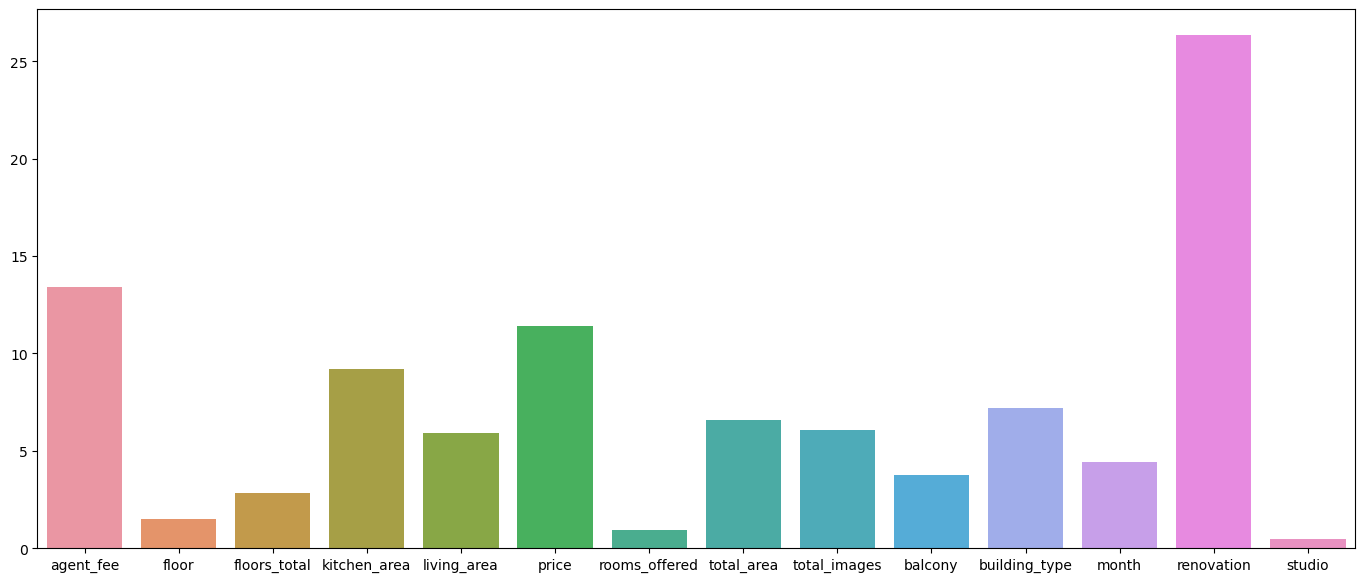

In [91]:
plt.figure(figsize=(17,7))
sns.barplot(x=X_train.columns, y=cbr.feature_importances_ );

In [92]:
imp_col = X_train.columns[cbr.feature_importances_>5]
print(imp_col)

Index(['agent_fee', 'kitchen_area', 'living_area', 'price', 'total_area',
       'total_images', 'building_type', 'renovation'],
      dtype='object')


In [93]:
new_cat_f = ['building_type', 'renovation']

In [94]:
new_X_train = X_train[imp_col]
new_X_test = X_test[imp_col]
new_X_train.head()

,agent_fee,kitchen_area,living_area,price,total_area,total_images,building_type,renovation
0,60.0,9.0,31.0,30000,48.0,12,4,0
1,50.0,-1.0,-1.0,55000,60.0,12,4,0
2,50.0,12.0,-1.0,45000,68.0,13,4,0
3,60.0,10.0,20.0,25000,40.0,12,6,0
4,50.0,8.0,30.0,50000,40.0,16,1,0


In [95]:
cbr = CatBoostRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_seed=0)
cbr.fit(new_X_train, y_train, cat_features=new_cat_f)
new_y_pred = cbr.predict(new_X_test)

0:	learn: 76.0081348	total: 13.4ms	remaining: 4.01s
1:	learn: 75.8252199	total: 23.9ms	remaining: 3.56s
2:	learn: 75.6673781	total: 34ms	remaining: 3.36s
3:	learn: 75.5114243	total: 45ms	remaining: 3.33s
4:	learn: 75.3360638	total: 56.5ms	remaining: 3.34s
5:	learn: 75.1857554	total: 66.4ms	remaining: 3.25s
6:	learn: 75.0616635	total: 78ms	remaining: 3.26s
7:	learn: 74.9446488	total: 87.6ms	remaining: 3.2s
8:	learn: 74.8303510	total: 98.9ms	remaining: 3.2s
9:	learn: 74.7121791	total: 110ms	remaining: 3.18s
10:	learn: 74.6041850	total: 120ms	remaining: 3.15s
11:	learn: 74.5050002	total: 131ms	remaining: 3.14s
12:	learn: 74.4273895	total: 143ms	remaining: 3.15s
13:	learn: 74.3315064	total: 153ms	remaining: 3.12s
14:	learn: 74.2505117	total: 164ms	remaining: 3.11s
15:	learn: 74.1743323	total: 174ms	remaining: 3.09s
16:	learn: 74.1031174	total: 183ms	remaining: 3.05s
17:	learn: 74.0329734	total: 194ms	remaining: 3.04s
18:	learn: 73.9756121	total: 203ms	remaining: 3s
19:	learn: 73.9180997	to

162:	learn: 72.3167827	total: 1.65s	remaining: 1.39s
163:	learn: 72.3092049	total: 1.67s	remaining: 1.38s
164:	learn: 72.3072353	total: 1.68s	remaining: 1.37s
165:	learn: 72.3015895	total: 1.69s	remaining: 1.36s
166:	learn: 72.2991328	total: 1.7s	remaining: 1.35s
167:	learn: 72.2968146	total: 1.71s	remaining: 1.34s
168:	learn: 72.2967798	total: 1.71s	remaining: 1.33s
169:	learn: 72.2877101	total: 1.72s	remaining: 1.32s
170:	learn: 72.2832490	total: 1.73s	remaining: 1.31s
171:	learn: 72.2693601	total: 1.74s	remaining: 1.3s
172:	learn: 72.2673599	total: 1.75s	remaining: 1.29s
173:	learn: 72.2656217	total: 1.76s	remaining: 1.28s
174:	learn: 72.2635123	total: 1.77s	remaining: 1.27s
175:	learn: 72.2627927	total: 1.78s	remaining: 1.26s
176:	learn: 72.2581720	total: 1.8s	remaining: 1.25s
177:	learn: 72.2479101	total: 1.8s	remaining: 1.24s
178:	learn: 72.2432420	total: 1.82s	remaining: 1.23s
179:	learn: 72.2382991	total: 1.83s	remaining: 1.22s
180:	learn: 72.2352794	total: 1.84s	remaining: 1.2

In [97]:
new_mae = mean_absolute_error(y_test, new_y_pred)
print(n_mae)

40.125490465971026
